# Split Dataset into train/val/test

In [2]:
import os
import shutil
import random
from pathlib import Path

def split_dataset(dataset_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42):
    random.seed(seed)
    dataset_dir = Path(dataset_dir)
    output_dir = Path(output_dir)

    # Create output directories
    for split in ["train", "val", "test"]:
        (output_dir / split).mkdir(parents=True, exist_ok=True)

    # Loop over each species/class
    for class_folder in os.listdir(dataset_dir):
        class_path = dataset_dir / class_folder
        if not class_path.is_dir():
            continue

        # Collect only valid files (skip hidden/system files)
        files = [f for f in class_path.glob("*") if f.is_file() and not f.name.startswith(".")]
        if not files:
            continue

        random.shuffle(files)

        # Compute split sizes
        n_total = len(files)
        n_train = int(n_total * train_ratio)
        n_val = int(n_total * val_ratio)

        train_files = files[:n_train]
        val_files = files[n_train:n_train+n_val]
        test_files = files[n_train+n_val:]

        # Function to copy files into new structure
        def copy_files(file_list, split):
            split_class_dir = output_dir / split / class_folder
            split_class_dir.mkdir(parents=True, exist_ok=True)
            for f in file_list:
                try:
                    shutil.copy(f, split_class_dir / f.name)
                except Exception as e:
                    print(f"⚠️ Skipping {f}: {e}")

        # Copy to respective folders
        copy_files(train_files, "train")
        copy_files(val_files, "val")
        copy_files(test_files, "test")

        print(f"Class {class_folder}: {n_train} train, {n_val} val, {len(test_files)} test")

# Example usage:
split_dataset("bird_dataset_CUB", "CUB_split")
split_dataset("bird_dataset_INAT", "iNat_split")
split_dataset("bird_audio", "Xeno_split")



Class 001.Black_footed_Albatross: 42 train, 9 val, 9 test
Class 002.Laysan_Albatross: 42 train, 9 val, 9 test
Class 003.Sooty_Albatross: 40 train, 8 val, 10 test
Class 004.Groove_billed_Ani: 42 train, 9 val, 9 test
Class 005.Crested_Auklet: 30 train, 6 val, 8 test
Class 006.Least_Auklet: 28 train, 6 val, 7 test
Class 007.Parakeet_Auklet: 37 train, 7 val, 9 test
Class 008.Rhinoceros_Auklet: 33 train, 7 val, 8 test
Class 009.Brewer_Blackbird: 42 train, 9 val, 9 test
Class 010.Red_winged_Blackbird: 42 train, 9 val, 9 test
Class 011.Rusty_Blackbird: 42 train, 9 val, 9 test
Class 012.Yellow_headed_Blackbird: 39 train, 8 val, 9 test
Class 013.Bobolink: 42 train, 9 val, 9 test
Class 014.Indigo_Bunting: 42 train, 9 val, 9 test
Class 015.Lazuli_Bunting: 40 train, 8 val, 10 test
Class 016.Painted_Bunting: 40 train, 8 val, 10 test
Class 017.Cardinal: 39 train, 8 val, 10 test
Class 018.Spotted_Catbird: 31 train, 6 val, 8 test
Class 019.Gray_Catbird: 41 train, 8 val, 10 test
Class 020.Yellow_breast

OSError: [WinError 112] There is not enough space on the disk: 'Xeno_split\\train\\Setophaga_fusca'

In [3]:
import os
import shutil
import random
from pathlib import Path

def split_dataset(
    dataset_dir,
    output_dir,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    seed=42,
    valid_exts=(".jpg", ".jpeg", ".png", ".mp3", ".wav")  # allowed file types
):
    random.seed(seed)
    dataset_dir = Path(dataset_dir)
    output_dir = Path(output_dir)

    # Create output directories
    for split in ["train", "val", "test"]:
        (output_dir / split).mkdir(parents=True, exist_ok=True)

    # Loop over each species/class
    for class_folder in os.listdir(dataset_dir):
        class_path = dataset_dir / class_folder
        if not class_path.is_dir():
            continue

        # Collect only valid files
        files = [
            f for f in class_path.glob("*")
            if f.is_file() and not f.name.startswith(".") and f.suffix.lower() in valid_exts
        ]
        if not files:
            print(f"⚠️ No valid files in {class_folder}, skipping.")
            continue

        random.shuffle(files)

        # Compute split sizes
        n_total = len(files)
        n_train = int(n_total * train_ratio)
        n_val = int(n_total * val_ratio)

        train_files = files[:n_train]
        val_files = files[n_train:n_train+n_val]
        test_files = files[n_train+n_val:]

        # Copy function
        def copy_files(file_list, split):
            split_class_dir = output_dir / split / class_folder
            split_class_dir.mkdir(parents=True, exist_ok=True)
            for f in file_list:
                try:
                    shutil.copy(f, split_class_dir / f.name)
                except Exception as e:
                    print(f"⚠️ Skipping {f}: {e}")

        # Copy to respective folders
        copy_files(train_files, "train")
        copy_files(val_files, "val")
        copy_files(test_files, "test")

        print(f"✅ {class_folder}: {n_train} train, {n_val} val, {len(test_files)} test")

# Example usage:
split_dataset("bird_dataset_CUB", "CUB_split")
split_dataset("bird_dataset_INAT", "iNat_split")
split_dataset("bird_audio", "Xeno_split")

✅ 001.Black_footed_Albatross: 42 train, 9 val, 9 test
✅ 002.Laysan_Albatross: 42 train, 9 val, 9 test
✅ 003.Sooty_Albatross: 40 train, 8 val, 10 test
✅ 004.Groove_billed_Ani: 42 train, 9 val, 9 test
✅ 005.Crested_Auklet: 30 train, 6 val, 8 test
✅ 006.Least_Auklet: 28 train, 6 val, 7 test
✅ 007.Parakeet_Auklet: 37 train, 7 val, 9 test
✅ 008.Rhinoceros_Auklet: 33 train, 7 val, 8 test
✅ 009.Brewer_Blackbird: 42 train, 9 val, 9 test
✅ 010.Red_winged_Blackbird: 42 train, 9 val, 9 test
✅ 011.Rusty_Blackbird: 42 train, 9 val, 9 test
✅ 012.Yellow_headed_Blackbird: 39 train, 8 val, 9 test
✅ 013.Bobolink: 42 train, 9 val, 9 test
✅ 014.Indigo_Bunting: 42 train, 9 val, 9 test
✅ 015.Lazuli_Bunting: 40 train, 8 val, 10 test
✅ 016.Painted_Bunting: 40 train, 8 val, 10 test
✅ 017.Cardinal: 39 train, 8 val, 10 test
✅ 018.Spotted_Catbird: 31 train, 6 val, 8 test
✅ 019.Gray_Catbird: 41 train, 8 val, 10 test
✅ 020.Yellow_breasted_Chat: 41 train, 8 val, 10 test
✅ 021.Eastern_Towhee: 42 train, 9 val, 9 test


# Training the Models

## Train EfficientNet using CUB-2011-200

In [2]:
pip install torch torchvision torchaudio

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/241.2 MB ? eta -:--:--
   - -------------------------------------- 7.9/241.2 MB 37.4 MB/s eta 0:00:07
   -- ------------------------------------- 17.0/241.2 MB 41.3 MB/s eta 0:00:06
   ---- ----------------------------------- 26.7/241.2 MB 42.4 MB/s eta 0:00:06
   ------ --------------------------------- 37.7/241.2 MB 46.2 MB/s eta 0:00:05
   -------- ------------------------------- 49.0/241.2 MB 48.0 MB/s eta 0:00:05
   --------- ------------------------------ 59.8/241.2 MB 48.2 MB/s eta 0:00:04
   ----------- ---------------------------- 69.7/241.2 MB 48.3 MB/s eta 0:00:04
   ------------- -------------------------- 80.7/241.2 MB 49.1 MB/s eta 0:00:04
   --------------- ------------------------ 92.5/241.2 MB 50.1 MB/s eta 0:00:03
   ---------------- ----------------------- 97.5/241.2 MB 50.6 MB/s eta 0:00:03
   --

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

# =========================
# CONFIG
# =========================
DATA_DIR = "CUB_split"   # your split dataset folder
BATCH_SIZE = 32
EPOCHS = 10
LR = 1e-3
NUM_CLASSES = 200   # change this depending on your dataset

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================
# DATA
# =========================
transform = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ])
}

train_data = datasets.ImageFolder(os.path.join(DATA_DIR, "train"), transform["train"])
val_data = datasets.ImageFolder(os.path.join(DATA_DIR, "val"), transform["val"])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

# =========================
# MODEL
# =========================
model = models.efficientnet_b0(pretrained=True)

# Freeze 80% of layers
num_layers = len(list(model.features.children()))
freeze_until = int(num_layers * 0.8)

for i, child in enumerate(model.features.children()):
    if i < freeze_until:
        for param in child.parameters():
            param.requires_grad = False

# Replace classifier
model.classifier[1] = nn.Linear(model.classifier[1].in_features, NUM_CLASSES)
model = model.to(DEVICE)

# Optimizer and Loss
trainable_params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.Adam(trainable_params, lr=LR)
criterion = nn.CrossEntropyLoss()

# =========================
# TRAINING LOOP
# =========================
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=EPOCHS):
    for epoch in range(epochs):
        # ---- Train ----
        model.train()
        running_loss, correct, total = 0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # ---- Validation ----
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = outputs.max(1)
                val_correct += preds.eq(labels).sum().item()
                val_total += labels.size(0)

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct / val_total

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    return model

# =========================
# RUN TRAINING
# =========================
trained_model = train_model(model, train_loader, val_loader, criterion, optimizer)
torch.save(trained_model.state_dict(), "efficientnet_birds.pth")
print("✅ Training finished and model saved!")


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Loss: 3.2120, Train Acc: 0.2820 Val Loss: 1.8343, Val Acc: 0.5139
Epoch [2/10] Train Loss: 1.4894, Train Acc: 0.6022 Val Loss: 1.5257, Val Acc: 0.5885
Epoch [3/10] Train Loss: 1.0106, Train Acc: 0.7139 Val Loss: 1.4044, Val Acc: 0.6221
Epoch [4/10] Train Loss: 0.7325, Train Acc: 0.7930 Val Loss: 1.4411, Val Acc: 0.6308
Epoch [5/10] Train Loss: 0.5315, Train Acc: 0.8514 Val Loss: 1.4533, Val Acc: 0.6262
Epoch [6/10] Train Loss: 0.4133, Train Acc: 0.8858 Val Loss: 1.5347, Val Acc: 0.6262
Epoch [7/10] Train Loss: 0.3376, Train Acc: 0.9075 Val Loss: 1.5178, Val Acc: 0.6377
Epoch [8/10] Train Loss: 0.2672, Train Acc: 0.9264 Val Loss: 1.5349, Val Acc: 0.6285
Epoch [9/10] Train Loss: 0.2394, Train Acc: 0.9313 Val Loss: 1.5861, Val Acc: 0.6372
Epoch [10/10] Train Loss: 0.1990, Train Acc: 0.9457 Val Loss: 1.5775, Val Acc: 0.6458
✅ Training finished and model saved!


## Train resnet50 using iNat

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os

# ============================
# Parameters
# ============================
data_dir = "iNat_split"   # <- your split dataset folder
batch_size = 32
num_epochs = 10
learning_rate = 0.001
freeze_ratio = 0.8  # freeze 80% of layers
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ============================
# Data transforms
# ============================
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    "test": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
}

# ============================
# Datasets and loaders
# ============================
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val", "test"]
}

dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2)
    for x in ["train", "val", "test"]
}

class_names = image_datasets["train"].classes
num_classes = len(class_names)

# ============================
# Load ResNet model
# ============================
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Freeze 80% of layers
all_layers = list(model.children())
num_freeze = int(len(all_layers) * freeze_ratio)
for i, child in enumerate(all_layers):
    if i < num_freeze:
        for param in child.parameters():
            param.requires_grad = False

# Replace final fully connected layer
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

model = model.to(device)

# ============================
# Loss & Optimizer
# ============================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),
                       lr=learning_rate)

# ============================
# Training loop
# ============================
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        # Each epoch has training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    return model

# ============================
# Train the model
# ============================
model = train_model(model, criterion, optimizer, num_epochs=num_epochs)

# ============================
# Save the trained model
# ============================
torch.save(model.state_dict(), "resnet_inat_frozen.pth")
print("✅ Model saved as resnet_inat_frozen.pth")


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\jayme/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


100.0%



Epoch 1/10
--------------------
train Loss: 4.8192 Acc: 0.1092
val Loss: 4.1191 Acc: 0.3011

Epoch 2/10
--------------------
train Loss: 3.2600 Acc: 0.5166
val Loss: 3.4789 Acc: 0.3864

Epoch 3/10
--------------------
train Loss: 2.4218 Acc: 0.6924
val Loss: 3.1372 Acc: 0.4318

Epoch 4/10
--------------------
train Loss: 1.8589 Acc: 0.7829
val Loss: 2.8664 Acc: 0.4583

Epoch 5/10
--------------------
train Loss: 1.4632 Acc: 0.8531
val Loss: 2.7334 Acc: 0.4830

Epoch 6/10
--------------------
train Loss: 1.1571 Acc: 0.9067
val Loss: 2.6077 Acc: 0.4830

Epoch 7/10
--------------------
train Loss: 0.9489 Acc: 0.9290
val Loss: 2.5262 Acc: 0.5095

Epoch 8/10
--------------------
train Loss: 0.7860 Acc: 0.9452
val Loss: 2.4576 Acc: 0.5341

Epoch 9/10
--------------------
train Loss: 0.6584 Acc: 0.9619
val Loss: 2.3890 Acc: 0.5303

Epoch 10/10
--------------------
train Loss: 0.5639 Acc: 0.9688
val Loss: 2.3629 Acc: 0.5227
✅ Model saved as resnet_inat_frozen.pth


# Audio Models

I am going to train both YAMNet and BirdNet model using the same method. YAMNet is a more generalised audio model while BirdNet focuces on Birds so it can identify bird down to the species. Since BirdNet is trained using Xeno-Canto audio, i cannot fine tune it using my own data as my own audio data is also gathered from xeno-canto. 
I am however going to compare the 2 models to and compare the results. If BirdNet performs suspiciously well, it could indicate leakage of the data. (Trade-offs between audio model will then be discussed in the report)


## Train YAMNet model using Xeno-Canto

In [5]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import librosa

# --------------------------
# Parameters
# --------------------------
DATASET_DIR = "Xeno_split"   # your dataset folder with train/val/test
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 1e-4
SR = 16000   # YAMNet expects 16kHz audio

# --------------------------
# Load YAMNet (feature extractor)
# --------------------------
yamnet_model_handle = "https://tfhub.dev/google/yamnet/1"
yamnet_model = hub.load(yamnet_model_handle)

# Function: convert wav to YAMNet embedding
def extract_embedding(filepath):
    # Load audio
    waveform, sr = librosa.load(filepath, sr=SR)
    waveform = waveform.astype(np.float32)

    # Run through YAMNet to get embeddings
    scores, embeddings, spectrogram = yamnet_model(waveform)
    embedding = tf.reduce_mean(embeddings, axis=0)  # average over time
    return embedding.numpy()

# --------------------------
# Dataset Loader
# --------------------------
def load_split(split_dir, class_names):
    files, labels = [], []
    for idx, species in enumerate(sorted(os.listdir(split_dir))):
        species_dir = os.path.join(split_dir, species)
        if not os.path.isdir(species_dir):
            continue
        for file in os.listdir(species_dir):
            if file.endswith(".wav"):
                files.append(os.path.join(species_dir, file))
                labels.append(class_names.index(species))
    return files, labels

# Prepare class names from train set
train_dir = os.path.join(DATASET_DIR, "train")
class_names = sorted(os.listdir(train_dir))

# Load splits
train_files, train_labels = load_split(train_dir, class_names)
val_files, val_labels = load_split(os.path.join(DATASET_DIR, "val"), class_names)
test_files, test_labels = load_split(os.path.join(DATASET_DIR, "test"), class_names)

print(f"Classes: {len(class_names)}")
print(f"Train: {len(train_files)} | Val: {len(val_files)} | Test: {len(test_files)}")

# --------------------------
# Convert audio to embeddings
# --------------------------
def prepare_dataset(file_list, labels):
    embeddings, y = [], []
    for f, l in zip(file_list, labels):
        try:
            emb = extract_embedding(f)
            embeddings.append(emb)
            y.append(l)
        except Exception as e:
            print(f"Error with {f}: {e}")
    return np.array(embeddings), np.array(y)

X_train, y_train = prepare_dataset(train_files, train_labels)
X_val, y_val = prepare_dataset(val_files, val_labels)
X_test, y_test = prepare_dataset(test_files, test_labels)

# --------------------------
# Build Classifier on Top of YAMNet
# --------------------------
# Freeze 80% of layers: in this case we only train the dense head
base_input = tf.keras.Input(shape=(1024,))
x = tf.keras.layers.Dense(512, activation="relu")(base_input)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs=base_input, outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# --------------------------
# Train
# --------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# --------------------------
# Evaluate
# --------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# --------------------------
# Save model
# --------------------------
model.save("yamnet_finetuned.h5")
print("Model saved as yamnet_finetuned.h5")


Classes: 371
Train: 136 | Val: 11 | Test: 60
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 371)               190323    
                                                                 
Total params: 715,123
Trainable params: 715,123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 33ms/step - loss: 5.9477 - accuracy: 0.0074 - val_loss: 5.9694 - val_accuracy: 0.0000e+00

# STEP 1: OOF Training

Although the models were initially trained and evaluated using the conventional train/validation/test split, they were retrained using Out-of-Fold (OOF) predictions to enable effective stacking for the ensemble. A simple train/val approach would introduce bias when training the meta-learner, as the validation set may already influence the base models during fine-tuning. By applying K-Fold cross-validation, each base model generates predictions on unseen data (the held-out fold), producing unbiased OOF predictions across the entire training set. These OOF predictions are then used as inputs to train the meta-learner, ensuring that the ensemble learns from fair representations of model performance and avoids data leakage, ultimately improving generalization on the final test set.

## 1.1 Preprocessing Dataset

### 1.11 Combing Test and Val in split datasets (OOF)

In [2]:
import os
import shutil
from pathlib import Path

def merge_train_val(dataset_dir, output_dir):
    dataset_dir = Path(dataset_dir)
    output_dir = Path(output_dir)

    merged_dir = output_dir / "train_val"
    merged_dir.mkdir(parents=True, exist_ok=True)

    for split in ["train", "val"]:
        split_dir = dataset_dir / split
        if not split_dir.exists():
            continue

        for class_folder in split_dir.iterdir():
            if not class_folder.is_dir():
                continue
            if class_folder.name.startswith("."):  # ✅ skip hidden folders
                continue

            target_class_dir = merged_dir / class_folder.name
            target_class_dir.mkdir(parents=True, exist_ok=True)

            for file in class_folder.iterdir():
                if file.name.startswith("."):  # ✅ skip hidden files/folders
                    continue
                try:
                    shutil.copy(file, target_class_dir / file.name)
                except Exception as e:
                    print(f"⚠️ Skipping {file}: {e}")

    # Copy test set separately
    test_dir = dataset_dir / "test"
    if test_dir.exists():
        for class_folder in test_dir.iterdir():
            if not class_folder.is_dir():
                continue
            if class_folder.name.startswith("."):  # ✅ skip hidden
                continue

            test_class_dir = output_dir / "test" / class_folder.name
            test_class_dir.mkdir(parents=True, exist_ok=True)

            for file in class_folder.iterdir():
                if file.name.startswith("."):  # ✅ skip hidden files/folders
                    continue
                try:
                    shutil.copy(file, test_class_dir / file.name)
                except Exception as e:
                    print(f"⚠️ Skipping {file}: {e}")

    print(f"✅ Merged train+val → {merged_dir}")
    print(f"✅ Copied test set → {output_dir/'test'}")

# Example usage:
merge_train_val("CUB_split", "CUB_split_OOF")
merge_train_val("iNat_split", "iNat_split_OOF")
merge_train_val("Xeno_split", "Xeno_split_OOF")



✅ Merged train+val → CUB_split_OOF\train_val
✅ Copied test set → CUB_split_OOF\test
✅ Merged train+val → iNat_split_OOF\train_val
✅ Copied test set → iNat_split_OOF\test
✅ Merged train+val → Xeno_split_OOF\train_val
✅ Copied test set → Xeno_split_OOF\test


### 1.12 Split NEW iNat dataset for OOF training

since i am using a new dataset (containing species found in CUB-200-2011), i have to split them for OOF training. 

In [3]:
import os
import shutil
import random

# ---------------------------
# Config
# ---------------------------
src_dir = "bird_dataset_INAT"      # Original dataset
dst_dir = "iNat_OOF"               # Output dataset
train_val_ratio = 0.8              # 80% train_val, 20% test
random_seed = 42

# ---------------------------
# Prepare directories
# ---------------------------
train_val_dir = os.path.join(dst_dir, "train_val")
test_dir = os.path.join(dst_dir, "test")
os.makedirs(train_val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# ---------------------------
# Split function
# ---------------------------
random.seed(random_seed)
species_list = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

for sp in species_list:
    sp_src = os.path.join(src_dir, sp)
    sp_train_val = os.path.join(train_val_dir, sp)
    sp_test = os.path.join(test_dir, sp)
    os.makedirs(sp_train_val, exist_ok=True)
    os.makedirs(sp_test, exist_ok=True)

    # List all images
    images = [f for f in os.listdir(sp_src) if os.path.isfile(os.path.join(sp_src, f))]
    random.shuffle(images)

    split_idx = int(len(images) * train_val_ratio)
    train_val_imgs = images[:split_idx]
    test_imgs = images[split_idx:]

    # Copy files
    for f in train_val_imgs:
        shutil.copy(os.path.join(sp_src, f), os.path.join(sp_train_val, f))
    for f in test_imgs:
        shutil.copy(os.path.join(sp_src, f), os.path.join(sp_test, f))

    print(f"{sp}: {len(train_val_imgs)} train_val, {len(test_imgs)} test")

print("\n✅ Dataset split complete!")
print(f"Train/Val dir: {train_val_dir}")
print(f"Test dir: {test_dir}")



.ipynb_checkpoints: 0 train_val, 0 test
001_Black_footed_Albatross: 16 train_val, 4 test
002_Laysan_Albatross: 8 train_val, 2 test
003_Sooty_Albatross: 8 train_val, 2 test
004_Groove_billed_Ani: 8 train_val, 2 test
005_Crested_Auklet: 8 train_val, 2 test
006_Least_Auklet: 8 train_val, 2 test
007_Parakeet_Auklet: 8 train_val, 2 test
008_Rhinoceros_Auklet: 8 train_val, 2 test
009_Brewer_Blackbird: 8 train_val, 2 test
010_Red_winged_Blackbird: 8 train_val, 2 test
011_Rusty_Blackbird: 8 train_val, 2 test
012_Yellow_headed_Blackbird: 8 train_val, 2 test
013_Bobolink: 8 train_val, 2 test
014_Indigo_Bunting: 8 train_val, 2 test
015_Lazuli_Bunting: 8 train_val, 2 test
016_Painted_Bunting: 8 train_val, 2 test
017_Cardinal: 8 train_val, 2 test
018_Spotted_Catbird: 8 train_val, 2 test
019_Gray_Catbird: 8 train_val, 2 test
020_Yellow_breasted_Chat: 8 train_val, 2 test
021_Eastern_Towhee: 8 train_val, 2 test
022_Chuck_will_Widow: 8 train_val, 2 test
023_Brandt_Cormorant: 8 train_val, 2 test
024_Red

### 1.13 Split NEW Xenocanto dataset for OOF training

In [7]:
import os
import shutil
import random

# ---------------------------
# Config
# ---------------------------
src_dir = "bird_dataset_XENO"     # original dataset
dst_dir = "XENO_OOF"              # output dataset
train_val_ratio = 0.8             # 80% train_val, 20% test
random_seed = 42

# ---------------------------
# Prepare directories
# ---------------------------
train_val_dir = os.path.join(dst_dir, "train_val")
test_dir = os.path.join(dst_dir, "test")
os.makedirs(train_val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# ---------------------------
# Split function
# ---------------------------
random.seed(random_seed)
species_list = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

for sp in species_list:
    sp_src = os.path.join(src_dir, sp)
    sp_train_val = os.path.join(train_val_dir, sp)
    sp_test = os.path.join(test_dir, sp)
    os.makedirs(sp_train_val, exist_ok=True)
    os.makedirs(sp_test, exist_ok=True)

    # List all audio files (wav, mp3, flac, etc.)
    audio_files = [f for f in os.listdir(sp_src) 
                   if os.path.isfile(os.path.join(sp_src, f)) 
                   and f.lower().endswith((".wav", ".mp3", ".flac"))]

    if not audio_files:
        print(f"⚠️ No audio found for {sp}, skipping...")
        continue

    random.shuffle(audio_files)
    split_idx = int(len(audio_files) * train_val_ratio)
    train_val_files = audio_files[:split_idx]
    test_files = audio_files[split_idx:]

    # Copy files
    for f in train_val_files:
        shutil.copy(os.path.join(sp_src, f), os.path.join(sp_train_val, f))
    for f in test_files:
        shutil.copy(os.path.join(sp_src, f), os.path.join(sp_test, f))

    print(f"{sp}: {len(train_val_files)} train_val, {len(test_files)} test")

print("\n✅ Audio dataset split complete!")
print(f"Train/Val dir: {train_val_dir}")
print(f"Test dir: {test_dir}")


001.Black_footed_Albatross: 8 train_val, 2 test
002.Laysan_Albatross: 8 train_val, 2 test
003.Sooty_Albatross: 6 train_val, 2 test
⚠️ No audio found for 004.Groove_billed_Ani, skipping...
005.Crested_Auklet: 3 train_val, 1 test
006.Least_Auklet: 8 train_val, 2 test
007.Parakeet_Auklet: 4 train_val, 2 test
008.Rhinoceros_Auklet: 0 train_val, 1 test
009.Brewer_Blackbird: 8 train_val, 2 test
010.Red_winged_Blackbird: 8 train_val, 2 test
011.Rusty_Blackbird: 8 train_val, 2 test
012.Yellow_headed_Blackbird: 8 train_val, 2 test
013.Bobolink: 8 train_val, 2 test
014.Indigo_Bunting: 8 train_val, 2 test
015.Lazuli_Bunting: 8 train_val, 2 test
016.Painted_Bunting: 8 train_val, 2 test
017.Cardinal: 8 train_val, 2 test
018.Spotted_Catbird: 8 train_val, 2 test
019.Gray_Catbird: 1 train_val, 1 test
020.Yellow_breasted_Chat: 4 train_val, 2 test
021.Eastern_Towhee: 8 train_val, 2 test
022.Chuck_will_Widow: 4 train_val, 2 test
023.Brandt_Cormorant: 5 train_val, 2 test
024.Red_faced_Cormorant: 4 train_v

## 1.2 Model Training

### 1.21 Train EfficientNet on CUB (OOF)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from sklearn.model_selection import KFold
import numpy as np

# -----------------------------
# Config
# -----------------------------
data_dir = "CUB_split_OOF/train_val"   # train+val merged
test_dir = "CUB_split_OOF/test"        # untouched final test set
num_classes = 200  # adjust for your dataset
batch_size = 32
epochs = 10
k_folds = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -----------------------------
# Transforms
# -----------------------------
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# -----------------------------
# Dataset & KFold Setup
# -----------------------------
dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# OOF predictions storage
oof_preds = np.zeros((len(dataset), num_classes))
oof_targets = np.zeros(len(dataset))

# -----------------------------
# Training Loop per Fold
# -----------------------------
for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"\n===== Fold {fold+1}/{k_folds} =====")

    # Subset samplers
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Model: EfficientNet
    model = models.efficientnet_b0(pretrained=True)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Train
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Fold {fold+1} | Epoch {epoch+1}/{epochs} | Loss: {running_loss/len(train_loader):.4f}")

    # Validation (OOF predictions)
    model.eval()
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()
            start = i * batch_size
            end = start + len(labels)
            oof_preds[val_idx[start:end]] = probs
            oof_targets[val_idx[start:end]] = labels.cpu().numpy()

# -----------------------------
# Save OOF results
# -----------------------------
np.save("efficientnet_oof_preds.npy", oof_preds)
np.save("efficientnet_oof_targets.npy", oof_targets)

print("✅ Finished OOF training and saved predictions.")



===== Fold 1/5 =====


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fold 1 | Epoch 1/10 | Loss: 4.7961
Fold 1 | Epoch 2/10 | Loss: 3.0160
Fold 1 | Epoch 3/10 | Loss: 1.9160
Fold 1 | Epoch 4/10 | Loss: 1.3181
Fold 1 | Epoch 5/10 | Loss: 0.9452
Fold 1 | Epoch 6/10 | Loss: 0.7036
Fold 1 | Epoch 7/10 | Loss: 0.5423
Fold 1 | Epoch 8/10 | Loss: 0.4139
Fold 1 | Epoch 9/10 | Loss: 0.3223
Fold 1 | Epoch 10/10 | Loss: 0.2616

===== Fold 2/5 =====
Fold 2 | Epoch 1/10 | Loss: 4.8043
Fold 2 | Epoch 2/10 | Loss: 3.0517
Fold 2 | Epoch 3/10 | Loss: 1.9450
Fold 2 | Epoch 4/10 | Loss: 1.3262
Fold 2 | Epoch 5/10 | Loss: 0.9617
Fold 2 | Epoch 6/10 | Loss: 0.7051
Fold 2 | Epoch 7/10 | Loss: 0.5428
Fold 2 | Epoch 8/10 | Loss: 0.4315
Fold 2 | Epoch 9/10 | Loss: 0.3297
Fold 2 | Epoch 10/10 | Loss: 0.2615

===== Fold 3/5 =====
Fold 3 | Epoch 1/10 | Loss: 4.7793
Fold 3 | Epoch 2/10 | Loss: 3.0499
Fold 3 | Epoch 3/10 | Loss: 1.9458
Fold 3 | Epoch 4/10 | Loss: 1.3274
Fold 3 | Epoch 5/10 | Loss: 0.9704
Fold 3 | Epoch 6/10 | Loss: 0.7135
Fold 3 | Epoch 7/10 | Loss: 0.5491
Fold 3 | 

### 1.22 Train ResNet on iNat dataset (OOF)

In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
import numpy as np
from tqdm import tqdm

# -------------------------
# Config
# -------------------------
data_dir = "iNat_OOF/train_val"   
num_classes = 200   # <-- update with the actual number of iNat species
batch_size = 16
num_epochs = 10
k_folds = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# Data transforms
# -------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_dir, transform=transform)

# Prepare OOF prediction storage
oof_preds = np.zeros((len(dataset), num_classes))
oof_targets = np.zeros(len(dataset))

# -------------------------
# Define model builder
# -------------------------
def build_model(num_classes):
    model = models.resnet50(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model.to(device)

# -------------------------
# K-Fold CV Loop
# -------------------------
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(dataset)))):
    print(f"\n📂 Fold {fold+1}/{k_folds}")

    # Subset samplers
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=4)

    # Model, loss, optimizer
    model = build_model(num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Fold {fold+1} Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        print(f"Train Loss: {running_loss/total:.4f}, Train Acc: {100.*correct/total:.2f}%")

        # Validation
        # Validation loop
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        val_outputs_list, val_targets_list, val_indices_list = [], [], []
        
        with torch.no_grad():
            for batch_idx, (inputs, labels) in enumerate(val_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
        
                val_loss += loss.item() * labels.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)
        
                # Collect predictions for OOF storage
                start = batch_idx * val_loader.batch_size
                end = start + labels.size(0)
                oof_preds[val_idx[start:end]] = outputs.cpu().numpy()
                oof_targets[val_idx[start:end]] = labels.cpu().numpy()


        print(f"Val Loss: {val_loss/val_total:.4f}, Val Acc: {100.*val_correct/val_total:.2f}%")

    # Save model checkpoint
    os.makedirs("checkpoints_resnet_inat", exist_ok=True)
    torch.save(model.state_dict(), f"checkpoints_resnet_inat/resnet_fold{fold+1}.pth")

# Save OOF preds for stacking
np.save("oof_preds_resnet_inat.npy", oof_preds)
np.save("oof_targets_resnet_inat.npy", oof_targets)

# Also save separate arrays for union-space stacking
np.save("oof_res_union.npy", oof_preds)
np.save("oof_labels_res.npy", oof_targets)

print("✅ Finished OOF training for ResNet on iNat!")



📂 Fold 1/5


Fold 1 Epoch 1/10: 100%|██████████| 81/81 [03:23<00:00,  2.51s/it]


Train Loss: 5.2218, Train Acc: 4.75%
Val Loss: 4.8255, Val Acc: 10.87%


Fold 1 Epoch 2/10: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 3.8822, Train Acc: 32.14%
Val Loss: 4.1828, Val Acc: 20.50%


Fold 1 Epoch 3/10: 100%|██████████| 81/81 [04:18<00:00,  3.20s/it]


Train Loss: 2.7828, Train Acc: 62.72%
Val Loss: 3.6590, Val Acc: 27.33%


Fold 1 Epoch 4/10: 100%|██████████| 81/81 [04:23<00:00,  3.26s/it]


Train Loss: 1.8085, Train Acc: 82.49%
Val Loss: 3.3264, Val Acc: 34.47%


Fold 1 Epoch 5/10: 100%|██████████| 81/81 [03:53<00:00,  2.89s/it]


Train Loss: 1.0700, Train Acc: 94.01%
Val Loss: 2.9598, Val Acc: 40.37%


Fold 1 Epoch 6/10: 100%|██████████| 81/81 [03:34<00:00,  2.64s/it]


Train Loss: 0.5462, Train Acc: 98.13%
Val Loss: 2.7723, Val Acc: 43.79%


Fold 1 Epoch 7/10: 100%|██████████| 81/81 [03:33<00:00,  2.64s/it]


Train Loss: 0.2763, Train Acc: 99.38%
Val Loss: 2.6794, Val Acc: 46.89%


Fold 1 Epoch 8/10: 100%|██████████| 81/81 [03:33<00:00,  2.64s/it]


Train Loss: 0.1569, Train Acc: 99.61%
Val Loss: 2.7097, Val Acc: 45.65%


Fold 1 Epoch 9/10: 100%|██████████| 81/81 [03:33<00:00,  2.64s/it]


Train Loss: 0.0985, Train Acc: 99.84%
Val Loss: 2.6640, Val Acc: 48.14%


Fold 1 Epoch 10/10: 100%|██████████| 81/81 [03:33<00:00,  2.64s/it]


Train Loss: 0.0709, Train Acc: 99.92%
Val Loss: 2.6479, Val Acc: 46.58%

📂 Fold 2/5


Fold 2 Epoch 1/10: 100%|██████████| 81/81 [03:33<00:00,  2.64s/it]


Train Loss: 5.2118, Train Acc: 4.98%
Val Loss: 4.8203, Val Acc: 7.45%


Fold 2 Epoch 2/10: 100%|██████████| 81/81 [03:33<00:00,  2.64s/it]


Train Loss: 3.8814, Train Acc: 33.54%
Val Loss: 4.2851, Val Acc: 16.46%


Fold 2 Epoch 3/10: 100%|██████████| 81/81 [03:50<00:00,  2.84s/it]


Train Loss: 2.8013, Train Acc: 60.23%
Val Loss: 3.8219, Val Acc: 27.64%


Fold 2 Epoch 4/10: 100%|██████████| 81/81 [04:06<00:00,  3.05s/it]


Train Loss: 1.8570, Train Acc: 81.09%
Val Loss: 3.4228, Val Acc: 35.09%


Fold 2 Epoch 5/10: 100%|██████████| 81/81 [04:08<00:00,  3.06s/it]


Train Loss: 1.0955, Train Acc: 92.37%
Val Loss: 3.2125, Val Acc: 38.20%


Fold 2 Epoch 6/10: 100%|██████████| 81/81 [04:38<00:00,  3.43s/it]


Train Loss: 0.5812, Train Acc: 97.98%
Val Loss: 3.0484, Val Acc: 40.68%


Fold 2 Epoch 7/10: 100%|██████████| 81/81 [04:20<00:00,  3.21s/it]


Train Loss: 0.2876, Train Acc: 99.38%
Val Loss: 2.9304, Val Acc: 44.10%


Fold 2 Epoch 8/10: 100%|██████████| 81/81 [03:54<00:00,  2.89s/it]


Train Loss: 0.1658, Train Acc: 99.77%
Val Loss: 2.9070, Val Acc: 46.27%


Fold 2 Epoch 9/10: 100%|██████████| 81/81 [03:54<00:00,  2.90s/it]


Train Loss: 0.1020, Train Acc: 99.61%
Val Loss: 2.9029, Val Acc: 45.96%


Fold 2 Epoch 10/10: 100%|██████████| 81/81 [04:09<00:00,  3.08s/it]


Train Loss: 0.0797, Train Acc: 99.53%
Val Loss: 2.8797, Val Acc: 46.58%

📂 Fold 3/5


Fold 3 Epoch 1/10: 100%|██████████| 81/81 [04:15<00:00,  3.16s/it]


Train Loss: 5.2611, Train Acc: 4.43%
Val Loss: 4.7917, Val Acc: 12.15%


Fold 3 Epoch 2/10: 100%|██████████| 81/81 [03:59<00:00,  2.95s/it]


Train Loss: 3.9344, Train Acc: 31.80%
Val Loss: 4.1290, Val Acc: 18.69%


Fold 3 Epoch 3/10: 100%|██████████| 81/81 [04:01<00:00,  2.99s/it]


Train Loss: 2.8090, Train Acc: 60.26%
Val Loss: 3.5450, Val Acc: 31.46%


Fold 3 Epoch 4/10: 100%|██████████| 81/81 [03:54<00:00,  2.89s/it]


Train Loss: 1.8460, Train Acc: 81.65%
Val Loss: 3.2187, Val Acc: 37.38%


Fold 3 Epoch 5/10: 100%|██████████| 81/81 [03:32<00:00,  2.63s/it]


Train Loss: 1.0993, Train Acc: 93.16%
Val Loss: 2.9249, Val Acc: 42.99%


Fold 3 Epoch 6/10: 100%|██████████| 81/81 [03:39<00:00,  2.70s/it]


Train Loss: 0.5924, Train Acc: 97.05%
Val Loss: 2.7786, Val Acc: 44.55%


Fold 3 Epoch 7/10: 100%|██████████| 81/81 [04:07<00:00,  3.05s/it]


Train Loss: 0.2986, Train Acc: 99.07%
Val Loss: 2.6898, Val Acc: 44.24%


Fold 3 Epoch 8/10: 100%|██████████| 81/81 [04:09<00:00,  3.09s/it]


Train Loss: 0.1577, Train Acc: 99.30%
Val Loss: 2.6169, Val Acc: 43.30%


Fold 3 Epoch 9/10: 100%|██████████| 81/81 [04:11<00:00,  3.11s/it]


Train Loss: 0.1114, Train Acc: 99.14%
Val Loss: 2.6039, Val Acc: 46.73%


Fold 3 Epoch 10/10: 100%|██████████| 81/81 [04:10<00:00,  3.09s/it]


Train Loss: 0.0780, Train Acc: 99.38%
Val Loss: 2.5932, Val Acc: 45.17%

📂 Fold 4/5


Fold 4 Epoch 1/10: 100%|██████████| 81/81 [04:01<00:00,  2.98s/it]


Train Loss: 5.2215, Train Acc: 5.13%
Val Loss: 4.7810, Val Acc: 13.08%


Fold 4 Epoch 2/10: 100%|██████████| 81/81 [04:09<00:00,  3.08s/it]


Train Loss: 3.8645, Train Acc: 36.55%
Val Loss: 4.1065, Val Acc: 24.30%


Fold 4 Epoch 3/10: 100%|██████████| 81/81 [04:05<00:00,  3.04s/it]


Train Loss: 2.7572, Train Acc: 64.31%
Val Loss: 3.6130, Val Acc: 30.53%


Fold 4 Epoch 4/10: 100%|██████████| 81/81 [03:57<00:00,  2.93s/it]


Train Loss: 1.7678, Train Acc: 82.12%
Val Loss: 3.3053, Val Acc: 35.51%


Fold 4 Epoch 5/10: 100%|██████████| 81/81 [04:14<00:00,  3.14s/it]


Train Loss: 1.0205, Train Acc: 93.78%
Val Loss: 3.0216, Val Acc: 38.01%


Fold 4 Epoch 6/10: 100%|██████████| 81/81 [04:06<00:00,  3.04s/it]


Train Loss: 0.5254, Train Acc: 98.13%
Val Loss: 2.8976, Val Acc: 41.12%


Fold 4 Epoch 7/10: 100%|██████████| 81/81 [04:10<00:00,  3.09s/it]


Train Loss: 0.2689, Train Acc: 98.99%
Val Loss: 2.8118, Val Acc: 43.61%


Fold 4 Epoch 8/10: 100%|██████████| 81/81 [04:02<00:00,  2.99s/it]


Train Loss: 0.1633, Train Acc: 98.91%
Val Loss: 2.7718, Val Acc: 43.30%


Fold 4 Epoch 9/10: 100%|██████████| 81/81 [03:54<00:00,  2.89s/it]


Train Loss: 0.1030, Train Acc: 99.30%
Val Loss: 2.7915, Val Acc: 44.86%


Fold 4 Epoch 10/10: 100%|██████████| 81/81 [04:11<00:00,  3.10s/it]


Train Loss: 0.0793, Train Acc: 99.14%
Val Loss: 2.7642, Val Acc: 43.61%

📂 Fold 5/5


Fold 5 Epoch 1/10: 100%|██████████| 81/81 [04:11<00:00,  3.10s/it]


Train Loss: 5.2103, Train Acc: 4.82%
Val Loss: 4.8548, Val Acc: 7.79%


Fold 5 Epoch 2/10: 100%|██████████| 81/81 [03:56<00:00,  2.91s/it]


Train Loss: 3.8238, Train Acc: 35.30%
Val Loss: 4.3259, Val Acc: 19.63%


Fold 5 Epoch 3/10: 100%|██████████| 81/81 [03:56<00:00,  2.91s/it]


Train Loss: 2.6946, Train Acc: 63.61%
Val Loss: 3.8118, Val Acc: 25.86%


Fold 5 Epoch 4/10: 100%|██████████| 81/81 [03:55<00:00,  2.91s/it]


Train Loss: 1.7394, Train Acc: 82.35%
Val Loss: 3.5035, Val Acc: 34.27%


Fold 5 Epoch 5/10: 100%|██████████| 81/81 [04:04<00:00,  3.02s/it]


Train Loss: 1.0269, Train Acc: 93.78%
Val Loss: 3.2394, Val Acc: 35.83%


Fold 5 Epoch 6/10: 100%|██████████| 81/81 [04:15<00:00,  3.15s/it]


Train Loss: 0.5214, Train Acc: 98.52%
Val Loss: 2.9896, Val Acc: 37.38%


Fold 5 Epoch 7/10: 100%|██████████| 81/81 [03:49<00:00,  2.84s/it]


Train Loss: 0.2640, Train Acc: 98.91%
Val Loss: 2.9130, Val Acc: 38.63%


Fold 5 Epoch 8/10: 100%|██████████| 81/81 [03:29<00:00,  2.59s/it]


Train Loss: 0.1578, Train Acc: 99.53%
Val Loss: 2.8653, Val Acc: 41.12%


Fold 5 Epoch 9/10: 100%|██████████| 81/81 [03:30<00:00,  2.59s/it]


Train Loss: 0.1045, Train Acc: 99.46%
Val Loss: 2.8721, Val Acc: 40.50%


Fold 5 Epoch 10/10: 100%|██████████| 81/81 [03:29<00:00,  2.58s/it]


Train Loss: 0.0678, Train Acc: 99.53%
Val Loss: 2.8369, Val Acc: 40.50%
✅ Finished OOF training for ResNet on iNat!


### 1.23 Train YAMNet on NEW audio dataset

In [4]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset
from sklearn.model_selection import KFold
import torchaudio
from tqdm import tqdm
import tensorflow_hub as hub
import tensorflow as tf

# -----------------------------
# Config
# -----------------------------
data_dir = "XENO_OOF/train_val"  # root of dataset
num_classes = 200                 # number of bird species
batch_size = 16
num_epochs = 40
k_folds = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -----------------------------
# Dataset
# -----------------------------
class BirdAudioDataset(Dataset):
    def __init__(self, root, max_len=16000*5):
        self.samples = []
        self.max_len = max_len
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(sorted(os.listdir(root)))}
        for cls_name, idx in self.class_to_idx.items():
            cls_folder = os.path.join(root, cls_name)
            for f in os.listdir(cls_folder):
                if f.endswith(".wav"):
                    self.samples.append((os.path.join(cls_folder, f), idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        waveform, sr = torchaudio.load(path)
        waveform = torchaudio.transforms.Resample(sr, 16000)(waveform)
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)  # convert to mono

        # Pad or truncate
        if waveform.shape[1] < self.max_len:
            pad = self.max_len - waveform.shape[1]
            waveform = torch.nn.functional.pad(waveform, (0, pad))
        else:
            waveform = waveform[:, :self.max_len]

        return waveform, label

# -----------------------------
# YAMNet wrapper
# -----------------------------
class YAMNetWrapper(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Load YAMNet from TF Hub
        self.base_model = hub.load("https://tfhub.dev/google/yamnet/1")
        self.fc = nn.Linear(1024, num_classes)  # 1024 = embedding size

    def forward(self, x):
        embeddings_list = []
        for wav in x:
            # wav: [1, time] tensor -> numpy float32
            wav_np = wav.squeeze().cpu().numpy().astype(np.float32)
            _, embeddings, _ = self.base_model(wav_np)
            emb_mean = torch.tensor(embeddings.numpy().mean(axis=0), device=device)
            embeddings_list.append(emb_mean)
        embeddings_batch = torch.stack(embeddings_list)  # [batch, 1024]
        return self.fc(embeddings_batch)                 # [batch, num_classes]

# -----------------------------
# Dataset + OOF storage
# -----------------------------
dataset = BirdAudioDataset(data_dir)
oof_preds = np.zeros((len(dataset), num_classes))
oof_targets = np.zeros(len(dataset))

# -----------------------------
# K-Fold Cross Validation
# -----------------------------
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(dataset)))):
    print(f"\n📂 Fold {fold+1}/{k_folds}")

    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=0)

    model = YAMNetWrapper(num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # -----------------------------
    # Training loop
    # -----------------------------
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for waveforms, labels in tqdm(train_loader, desc=f"Fold {fold+1} Epoch {epoch+1}/{num_epochs}"):
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(waveforms)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * labels.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
        print(f"Train Loss: {running_loss/total:.4f}, Train Acc: {100.*correct/total:.2f}%")

        # -----------------------------
        # Validation loop
        # -----------------------------
        model.eval()
        with torch.no_grad():
            for batch_idx, (waveforms, labels) in enumerate(val_loader):
                labels = labels.to(device)
                outputs = model(waveforms)
                start = batch_idx * val_loader.batch_size
                end = start + labels.size(0)
                oof_preds[val_idx[start:end]] = outputs.cpu().numpy()
                oof_targets[val_idx[start:end]] = labels.cpu().numpy()

    # Save fold checkpoint
    os.makedirs("checkpoints_yamnet_xeno", exist_ok=True)
    torch.save(model.state_dict(), f"checkpoints_yamnet_xeno/yamnet_fold{fold+1}.pth")

# -----------------------------
# Save OOF predictions
# -----------------------------
np.save("oof_preds_yamnet_xeno.npy", oof_preds)
np.save("oof_targets_yamnet_xeno.npy", oof_targets)
print("✅ Finished OOF training for YAMNet on Xeno-Canto dataset!")


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



📂 Fold 1/5


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchaudio\_backend\utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
Fold 1 Epoch 1/40: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Train Loss: 5.2938, Train Acc: 0.00%


Fold 1 Epoch 2/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 5.1748, Train Acc: 0.00%


Fold 1 Epoch 3/40: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Train Loss: 5.0645, Train Acc: 3.51%


Fold 1 Epoch 4/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 4.9431, Train Acc: 10.53%


Fold 1 Epoch 5/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 4.8380, Train Acc: 14.04%


Fold 1 Epoch 6/40: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


Train Loss: 4.7354, Train Acc: 15.79%


Fold 1 Epoch 7/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 4.6470, Train Acc: 15.79%


Fold 1 Epoch 8/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 4.5604, Train Acc: 17.54%


Fold 1 Epoch 9/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 4.4856, Train Acc: 17.54%


Fold 1 Epoch 10/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 4.4165, Train Acc: 17.54%


Fold 1 Epoch 11/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 4.3510, Train Acc: 17.54%


Fold 1 Epoch 12/40: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Train Loss: 4.2928, Train Acc: 17.54%


Fold 1 Epoch 13/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 4.2339, Train Acc: 17.54%


Fold 1 Epoch 14/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 4.1824, Train Acc: 17.54%


Fold 1 Epoch 15/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 4.1349, Train Acc: 19.30%


Fold 1 Epoch 16/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 4.0871, Train Acc: 19.30%


Fold 1 Epoch 17/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 4.0448, Train Acc: 19.30%


Fold 1 Epoch 18/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.0025, Train Acc: 19.30%


Fold 1 Epoch 19/40: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


Train Loss: 3.9603, Train Acc: 19.30%


Fold 1 Epoch 20/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 3.9227, Train Acc: 19.30%


Fold 1 Epoch 21/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 3.8854, Train Acc: 19.30%


Fold 1 Epoch 22/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 3.8498, Train Acc: 19.30%


Fold 1 Epoch 23/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 3.8145, Train Acc: 19.30%


Fold 1 Epoch 24/40: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Train Loss: 3.7815, Train Acc: 19.30%


Fold 1 Epoch 25/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 3.7481, Train Acc: 19.30%


Fold 1 Epoch 26/40: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


Train Loss: 3.7156, Train Acc: 19.30%


Fold 1 Epoch 27/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 3.6854, Train Acc: 19.30%


Fold 1 Epoch 28/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.6537, Train Acc: 19.30%


Fold 1 Epoch 29/40: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


Train Loss: 3.6232, Train Acc: 19.30%


Fold 1 Epoch 30/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 3.5945, Train Acc: 19.30%


Fold 1 Epoch 31/40: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Train Loss: 3.5661, Train Acc: 19.30%


Fold 1 Epoch 32/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.5389, Train Acc: 19.30%


Fold 1 Epoch 33/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 3.5104, Train Acc: 19.30%


Fold 1 Epoch 34/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.4836, Train Acc: 19.30%


Fold 1 Epoch 35/40: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


Train Loss: 3.4567, Train Acc: 21.05%


Fold 1 Epoch 36/40: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


Train Loss: 3.4323, Train Acc: 22.81%


Fold 1 Epoch 37/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.4065, Train Acc: 22.81%


Fold 1 Epoch 38/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.3805, Train Acc: 24.56%


Fold 1 Epoch 39/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 3.3563, Train Acc: 28.07%


Fold 1 Epoch 40/40: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Train Loss: 3.3327, Train Acc: 28.07%

📂 Fold 2/5


Fold 2 Epoch 1/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 5.3306, Train Acc: 0.00%


Fold 2 Epoch 2/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 5.2215, Train Acc: 0.00%


Fold 2 Epoch 3/40: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Train Loss: 5.1160, Train Acc: 0.00%


Fold 2 Epoch 4/40: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Train Loss: 5.0192, Train Acc: 1.75%


Fold 2 Epoch 5/40: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


Train Loss: 4.9135, Train Acc: 3.51%


Fold 2 Epoch 6/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 4.8293, Train Acc: 3.51%


Fold 2 Epoch 7/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 4.7436, Train Acc: 3.51%


Fold 2 Epoch 8/40: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Train Loss: 4.6592, Train Acc: 3.51%


Fold 2 Epoch 9/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 4.5814, Train Acc: 3.51%


Fold 2 Epoch 10/40: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


Train Loss: 4.5127, Train Acc: 3.51%


Fold 2 Epoch 11/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 4.4484, Train Acc: 7.02%


Fold 2 Epoch 12/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 4.3902, Train Acc: 7.02%


Fold 2 Epoch 13/40: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Train Loss: 4.3316, Train Acc: 8.77%


Fold 2 Epoch 14/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 4.2828, Train Acc: 8.77%


Fold 2 Epoch 15/40: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Train Loss: 4.2321, Train Acc: 10.53%


Fold 2 Epoch 16/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 4.1849, Train Acc: 10.53%


Fold 2 Epoch 17/40: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


Train Loss: 4.1408, Train Acc: 10.53%


Fold 2 Epoch 18/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 4.0998, Train Acc: 10.53%


Fold 2 Epoch 19/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 4.0598, Train Acc: 10.53%


Fold 2 Epoch 20/40: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]


Train Loss: 4.0214, Train Acc: 10.53%


Fold 2 Epoch 21/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.9841, Train Acc: 10.53%


Fold 2 Epoch 22/40: 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]


Train Loss: 3.9489, Train Acc: 10.53%


Fold 2 Epoch 23/40: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


Train Loss: 3.9141, Train Acc: 12.28%


Fold 2 Epoch 24/40: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Train Loss: 3.8806, Train Acc: 12.28%


Fold 2 Epoch 25/40: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Train Loss: 3.8473, Train Acc: 10.53%


Fold 2 Epoch 26/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.8148, Train Acc: 12.28%


Fold 2 Epoch 27/40: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


Train Loss: 3.7826, Train Acc: 12.28%


Fold 2 Epoch 28/40: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]


Train Loss: 3.7530, Train Acc: 14.04%


Fold 2 Epoch 29/40: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]


Train Loss: 3.7235, Train Acc: 14.04%


Fold 2 Epoch 30/40: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Train Loss: 3.6939, Train Acc: 14.04%


Fold 2 Epoch 31/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.6649, Train Acc: 12.28%


Fold 2 Epoch 32/40: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


Train Loss: 3.6366, Train Acc: 14.04%


Fold 2 Epoch 33/40: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Train Loss: 3.6086, Train Acc: 14.04%


Fold 2 Epoch 34/40: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


Train Loss: 3.5813, Train Acc: 15.79%


Fold 2 Epoch 35/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 3.5545, Train Acc: 15.79%


Fold 2 Epoch 36/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.5283, Train Acc: 19.30%


Fold 2 Epoch 37/40: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


Train Loss: 3.5018, Train Acc: 19.30%


Fold 2 Epoch 38/40: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]


Train Loss: 3.4767, Train Acc: 19.30%


Fold 2 Epoch 39/40: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Train Loss: 3.4506, Train Acc: 19.30%


Fold 2 Epoch 40/40: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


Train Loss: 3.4270, Train Acc: 17.54%

📂 Fold 3/5


Fold 3 Epoch 1/40: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


Train Loss: 5.2778, Train Acc: 0.00%


Fold 3 Epoch 2/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 5.1587, Train Acc: 0.00%


Fold 3 Epoch 3/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 5.0159, Train Acc: 5.17%


Fold 3 Epoch 4/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 4.8980, Train Acc: 5.17%


Fold 3 Epoch 5/40: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


Train Loss: 4.7893, Train Acc: 5.17%


Fold 3 Epoch 6/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 4.6866, Train Acc: 5.17%


Fold 3 Epoch 7/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 4.5931, Train Acc: 3.45%


Fold 3 Epoch 8/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 4.5105, Train Acc: 0.00%


Fold 3 Epoch 9/40: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Train Loss: 4.4347, Train Acc: 5.17%


Fold 3 Epoch 10/40: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Train Loss: 4.3666, Train Acc: 5.17%


Fold 3 Epoch 11/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.3028, Train Acc: 6.90%


Fold 3 Epoch 12/40: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Train Loss: 4.2438, Train Acc: 8.62%


Fold 3 Epoch 13/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 4.1901, Train Acc: 6.90%


Fold 3 Epoch 14/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.1387, Train Acc: 6.90%


Fold 3 Epoch 15/40: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Train Loss: 4.0906, Train Acc: 6.90%


Fold 3 Epoch 16/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 4.0461, Train Acc: 6.90%


Fold 3 Epoch 17/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.0033, Train Acc: 6.90%


Fold 3 Epoch 18/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.9615, Train Acc: 6.90%


Fold 3 Epoch 19/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.9216, Train Acc: 6.90%


Fold 3 Epoch 20/40: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Train Loss: 3.8853, Train Acc: 8.62%


Fold 3 Epoch 21/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.8484, Train Acc: 8.62%


Fold 3 Epoch 22/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.8118, Train Acc: 6.90%


Fold 3 Epoch 23/40: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Train Loss: 3.7777, Train Acc: 6.90%


Fold 3 Epoch 24/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.7444, Train Acc: 8.62%


Fold 3 Epoch 25/40: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


Train Loss: 3.7122, Train Acc: 8.62%


Fold 3 Epoch 26/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.6810, Train Acc: 8.62%


Fold 3 Epoch 27/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.6482, Train Acc: 8.62%


Fold 3 Epoch 28/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.6189, Train Acc: 8.62%


Fold 3 Epoch 29/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.5902, Train Acc: 10.34%


Fold 3 Epoch 30/40: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


Train Loss: 3.5600, Train Acc: 12.07%


Fold 3 Epoch 31/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 3.5315, Train Acc: 12.07%


Fold 3 Epoch 32/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 3.5024, Train Acc: 13.79%


Fold 3 Epoch 33/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.4756, Train Acc: 15.52%


Fold 3 Epoch 34/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.4505, Train Acc: 15.52%


Fold 3 Epoch 35/40: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Train Loss: 3.4222, Train Acc: 17.24%


Fold 3 Epoch 36/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.3960, Train Acc: 17.24%


Fold 3 Epoch 37/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.3720, Train Acc: 17.24%


Fold 3 Epoch 38/40: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Train Loss: 3.3462, Train Acc: 18.97%


Fold 3 Epoch 39/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.3225, Train Acc: 22.41%


Fold 3 Epoch 40/40: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


Train Loss: 3.2977, Train Acc: 22.41%

📂 Fold 4/5


Fold 4 Epoch 1/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 5.3223, Train Acc: 0.00%


Fold 4 Epoch 2/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 5.2042, Train Acc: 0.00%


Fold 4 Epoch 3/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 5.0921, Train Acc: 3.45%


Fold 4 Epoch 4/40: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Train Loss: 4.9901, Train Acc: 3.45%


Fold 4 Epoch 5/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 4.8900, Train Acc: 5.17%


Fold 4 Epoch 6/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 4.8015, Train Acc: 6.90%


Fold 4 Epoch 7/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 4.7234, Train Acc: 10.34%


Fold 4 Epoch 8/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 4.6481, Train Acc: 10.34%


Fold 4 Epoch 9/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 4.5827, Train Acc: 10.34%


Fold 4 Epoch 10/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 4.5179, Train Acc: 12.07%


Fold 4 Epoch 11/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 4.4601, Train Acc: 12.07%


Fold 4 Epoch 12/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 4.4047, Train Acc: 12.07%


Fold 4 Epoch 13/40: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


Train Loss: 4.3535, Train Acc: 12.07%


Fold 4 Epoch 14/40: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Train Loss: 4.3028, Train Acc: 12.07%


Fold 4 Epoch 15/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 4.2575, Train Acc: 12.07%


Fold 4 Epoch 16/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 4.2126, Train Acc: 12.07%


Fold 4 Epoch 17/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 4.1689, Train Acc: 12.07%


Fold 4 Epoch 18/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 4.1289, Train Acc: 13.79%


Fold 4 Epoch 19/40: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Train Loss: 4.0896, Train Acc: 12.07%


Fold 4 Epoch 20/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 4.0504, Train Acc: 13.79%


Fold 4 Epoch 21/40: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


Train Loss: 4.0130, Train Acc: 13.79%


Fold 4 Epoch 22/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.9768, Train Acc: 12.07%


Fold 4 Epoch 23/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 3.9413, Train Acc: 12.07%


Fold 4 Epoch 24/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 3.9057, Train Acc: 12.07%


Fold 4 Epoch 25/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.8727, Train Acc: 13.79%


Fold 4 Epoch 26/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.8398, Train Acc: 13.79%


Fold 4 Epoch 27/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.8067, Train Acc: 15.52%


Fold 4 Epoch 28/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.7752, Train Acc: 15.52%


Fold 4 Epoch 29/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.7438, Train Acc: 15.52%


Fold 4 Epoch 30/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.7135, Train Acc: 17.24%


Fold 4 Epoch 31/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 3.6837, Train Acc: 17.24%


Fold 4 Epoch 32/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.6538, Train Acc: 17.24%


Fold 4 Epoch 33/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.6250, Train Acc: 17.24%


Fold 4 Epoch 34/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.5961, Train Acc: 15.52%


Fold 4 Epoch 35/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 3.5679, Train Acc: 17.24%


Fold 4 Epoch 36/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.5401, Train Acc: 17.24%


Fold 4 Epoch 37/40: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Train Loss: 3.5130, Train Acc: 17.24%


Fold 4 Epoch 38/40: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Train Loss: 3.4866, Train Acc: 17.24%


Fold 4 Epoch 39/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.4599, Train Acc: 17.24%


Fold 4 Epoch 40/40: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


Train Loss: 3.4343, Train Acc: 18.97%

📂 Fold 5/5


Fold 5 Epoch 1/40: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


Train Loss: 5.2177, Train Acc: 0.00%


Fold 5 Epoch 2/40: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Train Loss: 5.0859, Train Acc: 3.45%


Fold 5 Epoch 3/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 4.9772, Train Acc: 3.45%


Fold 5 Epoch 4/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.8634, Train Acc: 3.45%


Fold 5 Epoch 5/40: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Train Loss: 4.7629, Train Acc: 6.90%


Fold 5 Epoch 6/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.6767, Train Acc: 6.90%


Fold 5 Epoch 7/40: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


Train Loss: 4.5988, Train Acc: 6.90%


Fold 5 Epoch 8/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 4.5252, Train Acc: 8.62%


Fold 5 Epoch 9/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 4.4614, Train Acc: 8.62%


Fold 5 Epoch 10/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 4.4047, Train Acc: 10.34%


Fold 5 Epoch 11/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.3475, Train Acc: 10.34%


Fold 5 Epoch 12/40: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Train Loss: 4.2948, Train Acc: 12.07%


Fold 5 Epoch 13/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 4.2467, Train Acc: 12.07%


Fold 5 Epoch 14/40: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Train Loss: 4.2021, Train Acc: 12.07%


Fold 5 Epoch 15/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 4.1582, Train Acc: 12.07%


Fold 5 Epoch 16/40: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Train Loss: 4.1161, Train Acc: 12.07%


Fold 5 Epoch 17/40: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


Train Loss: 4.0763, Train Acc: 12.07%


Fold 5 Epoch 18/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.0383, Train Acc: 13.79%


Fold 5 Epoch 19/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 4.0001, Train Acc: 13.79%


Fold 5 Epoch 20/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 3.9654, Train Acc: 13.79%


Fold 5 Epoch 21/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.9299, Train Acc: 12.07%


Fold 5 Epoch 22/40: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Train Loss: 3.8946, Train Acc: 13.79%


Fold 5 Epoch 23/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.8620, Train Acc: 15.52%


Fold 5 Epoch 24/40: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Train Loss: 3.8281, Train Acc: 15.52%


Fold 5 Epoch 25/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 3.7980, Train Acc: 15.52%


Fold 5 Epoch 26/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.7651, Train Acc: 17.24%


Fold 5 Epoch 27/40: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Train Loss: 3.7338, Train Acc: 17.24%


Fold 5 Epoch 28/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.7053, Train Acc: 17.24%


Fold 5 Epoch 29/40: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


Train Loss: 3.6745, Train Acc: 17.24%


Fold 5 Epoch 30/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.6463, Train Acc: 17.24%


Fold 5 Epoch 31/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.6173, Train Acc: 17.24%


Fold 5 Epoch 32/40: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


Train Loss: 3.5902, Train Acc: 20.69%


Fold 5 Epoch 33/40: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Train Loss: 3.5630, Train Acc: 24.14%


Fold 5 Epoch 34/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.5341, Train Acc: 22.41%


Fold 5 Epoch 35/40: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


Train Loss: 3.5082, Train Acc: 24.14%


Fold 5 Epoch 36/40: 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]


Train Loss: 3.4824, Train Acc: 24.14%


Fold 5 Epoch 37/40: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


Train Loss: 3.4558, Train Acc: 24.14%


Fold 5 Epoch 38/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.4300, Train Acc: 25.86%


Fold 5 Epoch 39/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.4060, Train Acc: 24.14%


Fold 5 Epoch 40/40: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


Train Loss: 3.3818, Train Acc: 24.14%
✅ Finished OOF training for YAMNet on Xeno-Canto dataset!


# STEP 2: Evaluation of Individual Models


=== Evaluating EfficientNet ===
Top-1 Accuracy: 0.7645
Top-5 Accuracy: 0.9478


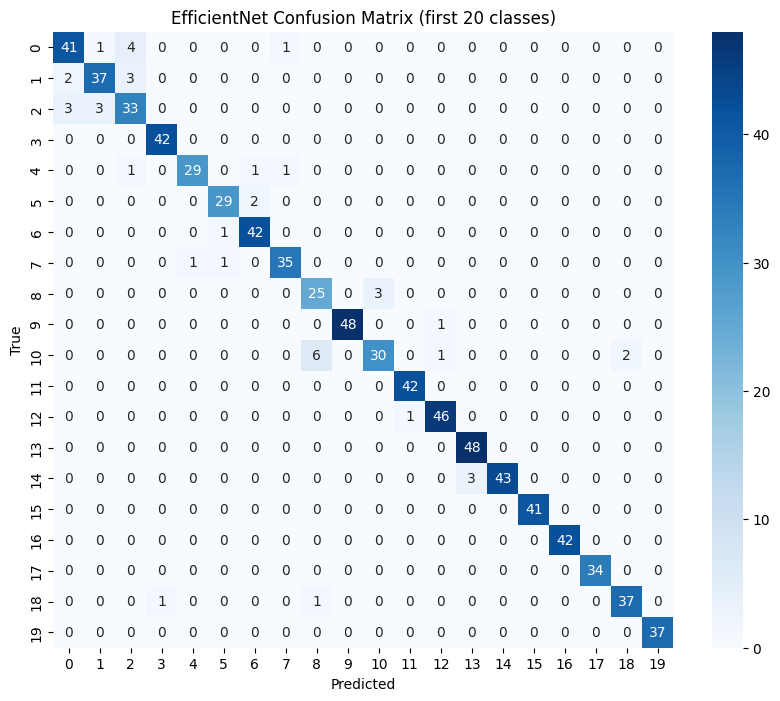


=== Evaluating ResNet ===
Top-1 Accuracy: 0.4449
Top-5 Accuracy: 0.6067


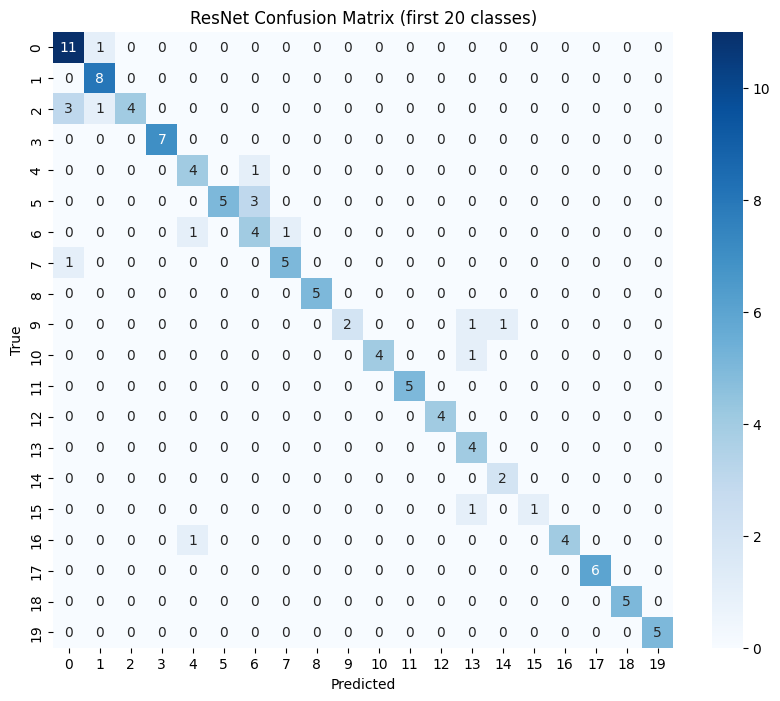


=== Evaluating YAMNet ===
Top-1 Accuracy: 0.0972
Top-5 Accuracy: 0.4722


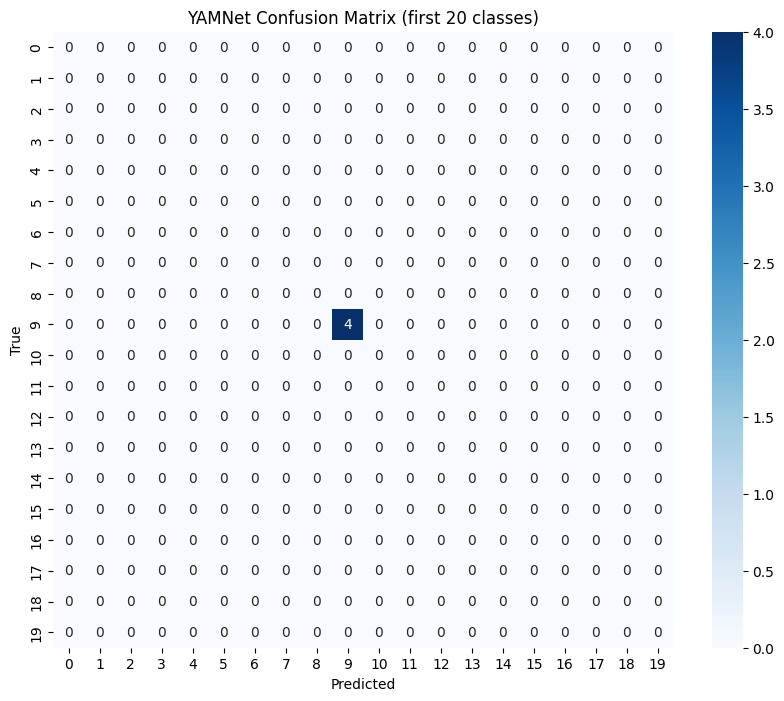


=== Summary ===
EfficientNet: Top-1 = 0.7645, Top-5 = 0.9478
ResNet: Top-1 = 0.4449, Top-5 = 0.6067
YAMNet: Top-1 = 0.0972, Top-5 = 0.4722


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, top_k_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1. Configuration: files
# --------------------------
models_info = {
    "EfficientNet": {
        "oof_preds": "efficientnet_oof_preds.npy",
        "oof_targets": "efficientnet_oof_targets.npy"
    },
    "ResNet": {
        "oof_preds": "oof_preds_resnet_inat.npy",
        "oof_targets": "oof_targets_resnet_inat.npy"
    },
    "YAMNet": {
        "oof_preds": "oof_preds_yamnet_xeno.npy",
        "oof_targets": "oof_targets_yamnet_xeno.npy"
    }
}

# --------------------------
# 2. Evaluate each model
# --------------------------
results = {}

for name, paths in models_info.items():
    print(f"\n=== Evaluating {name} ===")
    
    oof_preds = np.load(paths["oof_preds"])
    oof_targets = np.load(paths["oof_targets"])
    
    # Ensure targets match prediction shape
    N_pred = oof_preds.shape[0]
    N_tgt = oof_targets.shape[0]
    if N_pred != N_tgt:
        raise ValueError(f"Number of predictions ({N_pred}) does not match number of targets ({N_tgt}) for {name}")
    
    # Use all possible classes to avoid Top-K mismatch
    all_classes = np.arange(oof_preds.shape[1])
    
    top1 = accuracy_score(oof_targets, oof_preds.argmax(axis=1))
    top5 = top_k_accuracy_score(oof_targets, oof_preds, k=5, labels=all_classes)
    
    print(f"Top-1 Accuracy: {top1:.4f}")
    print(f"Top-5 Accuracy: {top5:.4f}")
    
    results[name] = {"Top-1": top1, "Top-5": top5}
    
    # Optional: plot confusion matrix for first 20 classes
    N_classes = min(oof_preds.shape[1], 20)
    cm = confusion_matrix(oof_targets, oof_preds.argmax(axis=1), labels=all_classes)
    cm_small = cm[:N_classes, :N_classes]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_small, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix (first {N_classes} classes)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# --------------------------
# 3. Summary Table
# --------------------------
print("\n=== Summary ===")
for name, metrics in results.items():
    print(f"{name}: Top-1 = {metrics['Top-1']:.4f}, Top-5 = {metrics['Top-5']:.4f}")



# STEP 3: Assemble OOF Predictions

In this step, we aligned the out-of-fold (OOF) predictions from three different models—EfficientNet, ResNet, and YAMNet—into a common 200-class label space corresponding to our bird species. Although the models were trained on different datasets (CUB, iNat, Xeno-Canto), the species labels are consistent across datasets. Aligning the OOF predictions is necessary to ensure that each class corresponds to the same species in all three models, which allows us to meaningfully combine their outputs in a subsequent meta-classifier. Without this alignment, the fusion of predictions could be misinterpreted, leading to incorrect ensemble outputs.

In [5]:
import numpy as np

# Load predictions
effnet_preds = np.load("efficientnet_oof_preds.npy")   # [N_cub, 200]
effnet_tgts  = np.load("efficientnet_oof_targets.npy") # [N_cub]

resnet_preds = np.load("oof_preds_resnet_inat.npy")   # [N_inat, 200]
resnet_tgts  = np.load("oof_targets_resnet_inat.npy") # [N_inat]

yamnet_preds = np.load("oof_preds_yamnet_xeno.npy")   # [N_xeno, 200]
yamnet_tgts  = np.load("oof_targets_yamnet_xeno.npy") # [N_xeno]

# Save all in a dictionary for later fusion
np.savez("oof_all_models.npz",
         effnet_preds=effnet_preds, effnet_tgts=effnet_tgts,
         resnet_preds=resnet_preds, resnet_tgts=resnet_tgts,
         yamnet_preds=yamnet_preds, yamnet_tgts=yamnet_tgts)

print("📦 Saved unified OOF container with shapes:")
print("EffNet:", effnet_preds.shape, effnet_tgts.shape)
print("ResNet:", resnet_preds.shape, resnet_tgts.shape)
print("YAMNet:", yamnet_preds.shape, yamnet_tgts.shape)



📦 Saved unified OOF container with shapes:
EffNet: (9963, 200) (9963,)
ResNet: (1607, 200) (1607,)
YAMNet: (72, 200) (72,)


In [9]:
import numpy as np

# --------------------------
# 1️⃣ Load classes
# --------------------------
with open("classes.txt") as f:
    class_names = [line.strip() for line in f]

num_classes = len(class_names)
class_to_idx = {name: i for i, name in enumerate(class_names)}

# --------------------------
# 2️⃣ Load OOF predictions
# --------------------------
models_info = {
    "EffNet": ("efficientnet_oof_preds.npy", "efficientnet_oof_targets.npy"),
    "ResNet": ("oof_preds_resnet_inat.npy", "oof_targets_resnet_inat.npy"),
    "YAMNet": ("oof_preds_yamnet_xeno.npy", "oof_targets_yamnet_xeno.npy")
}

oof_preds_aligned = {}
oof_targets_aligned = {}

for name, (pred_file, tgt_file) in models_info.items():
    preds = np.load(pred_file)  # shape: [N_samples, model_classes]
    tgts = np.load(tgt_file)    # shape: [N_samples,] or [N_samples, 1]

    # Ensure targets are 1D
    tgts = tgts.ravel()

    # Create aligned prediction array
    aligned_preds = np.zeros((len(preds), num_classes), dtype=np.float32)

    # If the model's classes are already in numerical order matching class_names:
    # Copy predictions into the correct columns
    min_classes = min(preds.shape[1], num_classes)
    aligned_preds[:, :min_classes] = preds[:, :min_classes]

    oof_preds_aligned[name] = aligned_preds
    oof_targets_aligned[name] = tgts

    print(f"{name}: preds {aligned_preds.shape}, targets {tgts.shape}")

# --------------------------
# 3️⃣ Save aligned OOF predictions
# --------------------------
np.save("oof_preds_effnet_aligned.npy", oof_preds_aligned["EffNet"])
np.save("oof_preds_resnet_aligned.npy", oof_preds_aligned["ResNet"])
np.save("oof_preds_yamnet_aligned.npy", oof_preds_aligned["YAMNet"])
np.save("oof_targets.npy", oof_targets_aligned["EffNet"])  # assume targets are shared

print("✅ Aligned OOF predictions saved!")


EffNet: preds (9963, 200), targets (9963,)
ResNet: preds (1607, 200), targets (1607,)
YAMNet: preds (72, 200), targets (72,)
✅ Aligned OOF predictions saved!


# STEP 4: Train Meta-Classifier

In Step 4, I trained a separate meta-classifier for each base model (EfficientNet, ResNet, and YAMNet) using their own out-of-fold (OOF) predictions and ground-truth targets. This step is necessary because each base model produces predictions on different datasets and covers different subsets of the overall 200-class space. By training a meta-classifier individually for each model, allowing it to learn how to best calibrate and refine that model’s raw predictions into improved class probabilities. This ensures that, even though the datasets are not directly aligned, each model contributes meaningful, standardized outputs that can later be combined through ensembling (e.g., weighted averaging) to produce a single unified prediction across all 200 classes.

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, top_k_accuracy_score
import joblib

# -----------------------------
# 1️⃣ Load classes
# -----------------------------
with open("classes.txt") as f:
    class_names = [line.strip() for line in f]

num_classes = len(class_names)
class_to_idx = {name: i for i, name in enumerate(class_names)}

# -----------------------------
# 2️⃣ Load aligned OOF predictions
# -----------------------------
effnet_preds = np.load("oof_preds_effnet_aligned.npy")    # [N_effnet, 200]
effnet_targets = np.load("efficientnet_oof_targets.npy")

resnet_preds = np.load("oof_preds_resnet_aligned.npy")    # [N_resnet, 200]
resnet_targets = np.load("oof_targets_resnet_inat.npy")

yamnet_preds = np.load("oof_preds_yamnet_aligned.npy")    # [N_yamnet, 200]
yamnet_targets = np.load("oof_targets_yamnet_xeno.npy")

# Ensure targets are 1D
effnet_targets = effnet_targets.ravel()
resnet_targets = resnet_targets.ravel()
yamnet_targets = yamnet_targets.ravel()

# -----------------------------
# Helper: Expand probs to 200-class space
# -----------------------------
def expand_probs(probs, classes, num_classes):
    """Expand smaller prob arrays into full num_classes by filling learned class indices."""
    expanded = np.zeros((probs.shape[0], num_classes))
    classes = classes.astype(int)   # ✅ ensure integer indices
    expanded[:, classes] = probs
    return expanded

# -----------------------------
# 3️⃣ Train meta-classifier for each model
# -----------------------------
def train_meta_learner(model_preds, model_targets, model_name, test_size=0.2, random_state=42):
    print(f"\nTraining meta-classifier for {model_name}...")
    
    # Train/val split
    X_train, X_val, y_train, y_val = train_test_split(
        model_preds, model_targets, test_size=test_size, random_state=random_state, stratify=model_targets
    )
    
    meta = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000
    )
    meta.fit(X_train, y_train)
    
    # Predictions
    val_probs = meta.predict_proba(X_val)
    learned_classes = meta.classes_
    
    # Expand into full 200-class space
    val_probs_expanded = expand_probs(val_probs, learned_classes, num_classes)
    
    # Eval
    top1 = accuracy_score(y_val, val_probs_expanded.argmax(axis=1))
    top5 = top_k_accuracy_score(
        y_val, 
        val_probs_expanded, 
        k=5, 
        labels=np.arange(num_classes)  # ✅ force full 200-class space
)

    
    print(f"📊 {model_name} Meta-Learner Performance: Top-1 = {top1:.4f}, Top-5 = {top5:.4f}")
    
    return meta, learned_classes

# Train all three
meta_effnet, effnet_classes = train_meta_learner(effnet_preds, effnet_targets, "EffNet")
meta_resnet, resnet_classes = train_meta_learner(resnet_preds, resnet_targets, "ResNet")
meta_yamnet, yamnet_classes = train_meta_learner(yamnet_preds, yamnet_targets, "YAMNet")

# -----------------------------
# 4️⃣ Save trained meta-classifiers
# -----------------------------
joblib.dump((meta_effnet, effnet_classes), "meta_effnet.pkl")
joblib.dump((meta_resnet, resnet_classes), "meta_resnet.pkl")
joblib.dump((meta_yamnet, yamnet_classes), "meta_yamnet.pkl")
print("\n✅ All meta-classifiers saved!")

# -----------------------------
# 5️⃣ Weighted Fusion
# -----------------------------
weights = {"EffNet": 0.5, "ResNet": 0.3, "YAMNet": 0.2}

def fuse_predictions(sample_preds):
    fused = (
        weights["EffNet"] * expand_probs(meta_effnet.predict_proba(sample_preds["EffNet"]), effnet_classes, num_classes) +
        weights["ResNet"] * expand_probs(meta_resnet.predict_proba(sample_preds["ResNet"]), resnet_classes, num_classes) +
        weights["YAMNet"] * expand_probs(meta_yamnet.predict_proba(sample_preds["YAMNet"]), yamnet_classes, num_classes)
    )
    return fused

# Example fusion (using EffNet’s dataset as reference, placeholders for others)
sample_preds = {
    "EffNet": effnet_preds,
    "ResNet": np.zeros_like(effnet_preds),
    "YAMNet": np.zeros_like(effnet_preds)
}

fused_probs = fuse_predictions(sample_preds)
fused_top1 = fused_probs.argmax(axis=1)

print(f"\nFused predictions shape: {fused_probs.shape}, example Top-1 indices: {fused_top1[:10]}")



Training meta-classifier for EffNet...


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 EffNet Meta-Learner Performance: Top-1 = 0.7592, Top-5 = 0.9333

Training meta-classifier for ResNet...


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 ResNet Meta-Learner Performance: Top-1 = 0.3571, Top-5 = 0.5714

Training meta-classifier for YAMNet...


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 YAMNet Meta-Learner Performance: Top-1 = 0.2667, Top-5 = 0.4000

✅ All meta-classifiers saved!

Fused predictions shape: (9963, 200), example Top-1 indices: [  0   0 159 159 159   0 159   0 159   0]


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# STEP 5: Fuse Predictions for Ensemble Output

In Step 5, I combined the outputs of the individual meta-classifiers to produce a single, unified prediction for each sample. Using weighted averaging, I fused the probability distributions from EffNet, ResNet, and YAMNet (when available) to create a consensus prediction that leverages the strengths of each model. This step is necessary because it allows the ensemble to make more robust and accurate predictions than any single base model, while also providing flexibility to adjust weights based on model performance or modality availability.

This weighted averaging approach was chosen because it is a simple yet effective method for combining predictions from multiple models, especially when the models differ in input modality, dataset size, or performance. By assigning higher weights to more accurate models (e.g., EffNet and ResNet for images) and lower weights to less reliable models (e.g., YAMNet for sparse audio samples), the ensemble can emphasize the strongest signals while still incorporating complementary information. This method also avoids the complexity of training an additional meta-classifier over misaligned datasets and works well when the models’ outputs are probability distributions over the same class space.

In [2]:
import numpy as np
import joblib

# Load meta-classifiers
meta_effnet, effnet_classes = joblib.load("meta_effnet.pkl")
meta_resnet, resnet_classes = joblib.load("meta_resnet.pkl")
meta_yamnet, yamnet_classes = joblib.load("meta_yamnet.pkl")

num_classes = 200

# Expand utility
def expand_probs(probs, learned_classes, num_classes):
    expanded = np.zeros((probs.shape[0], num_classes))
    expanded[:, learned_classes.astype(int)] = probs
    return expanded

# Load aligned OOF predictions (all must have SAME N)
effnet_preds = np.load("oof_preds_effnet_aligned.npy")
resnet_preds = np.load("oof_preds_resnet_aligned.npy")
yamnet_preds = np.load("oof_preds_yamnet_aligned.npy")

print("EffNet OOF shape:", effnet_preds.shape)
print("ResNet OOF shape:", resnet_preds.shape)
print("YAMNet OOF shape:", yamnet_preds.shape)

N = min(effnet_preds.shape[0], resnet_preds.shape[0], yamnet_preds.shape[0])

# Truncate all to same length (temporary workaround)
effnet_preds = effnet_preds[:N]
resnet_preds = resnet_preds[:N]
yamnet_preds = yamnet_preds[:N]

# Meta-level predictions
effnet_probs = expand_probs(meta_effnet.predict_proba(effnet_preds), effnet_classes, num_classes)
resnet_probs = expand_probs(meta_resnet.predict_proba(resnet_preds), resnet_classes, num_classes)
yamnet_probs = expand_probs(meta_yamnet.predict_proba(yamnet_preds), yamnet_classes, num_classes)

# Weights
weights = {"EffNet": 0.5, "ResNet": 0.3, "YAMNet": 0.2}

# Fuse
fused = (
    weights["EffNet"] * effnet_probs +
    weights["ResNet"] * resnet_probs +
    weights["YAMNet"] * yamnet_probs
)

print("✅ Fused predictions shape:", fused.shape)


EffNet OOF shape: (9963, 200)
ResNet OOF shape: (1607, 200)
YAMNet OOF shape: (72, 200)
✅ Fused predictions shape: (72, 200)


In [6]:
import numpy as np

# --------------------------
# Load meta-classifiers
# --------------------------
import joblib
meta_effnet, effnet_classes = joblib.load("meta_effnet.pkl")
meta_resnet, resnet_classes = joblib.load("meta_resnet.pkl")
meta_yamnet, yamnet_classes = joblib.load("meta_yamnet.pkl")

num_classes = 200  # full class space

# --------------------------
# Expand helper
# --------------------------
def expand_probs(probs, classes, num_classes):
    """Expand smaller prob arrays into full num_classes by filling learned class indices."""
    expanded = np.zeros((probs.shape[0], num_classes))
    expanded[:, classes.astype(int)] = probs
    return expanded

# --------------------------
# Fusion Functions (Option B)
# --------------------------
def fuse_flexible(sample_preds, weights):
    """
    Flexible fallback fusion:
    - If EffNet only → return EffNet
    - If EffNet + ResNet → fuse them
    - If EffNet + ResNet + YAMNet → fuse all three
    """
    fused_outputs = []

    for i in range(len(sample_preds["EffNet"])):  # loop over samples
        effnet_probs = expand_probs(
            meta_effnet.predict_proba(sample_preds["EffNet"][i:i+1]),
            effnet_classes, num_classes
        )

        # Start with EffNet
        fused = weights["EffNet"] * effnet_probs

        # Add ResNet if available for this sample
        if i < len(sample_preds["ResNet"]):
            resnet_probs = expand_probs(
                meta_resnet.predict_proba(sample_preds["ResNet"][i:i+1]),
                resnet_classes, num_classes
            )
            fused += weights["ResNet"] * resnet_probs

        # Add YAMNet if available for this sample
        if i < len(sample_preds["YAMNet"]):
            yamnet_probs = expand_probs(
                meta_yamnet.predict_proba(sample_preds["YAMNet"][i:i+1]),
                yamnet_classes, num_classes
            )
            fused += weights["YAMNet"] * yamnet_probs

        fused_outputs.append(fused)

    return np.vstack(fused_outputs)

# --------------------------
# Example usage
# --------------------------
# Assume you already loaded aligned OOF predictions
effnet_preds = np.load("oof_preds_effnet_aligned.npy")
resnet_preds = np.load("oof_preds_resnet_aligned.npy")
yamnet_preds = np.load("oof_preds_yamnet_aligned.npy")

sample_preds = {
    "EffNet": effnet_preds,
    "ResNet": resnet_preds,
    "YAMNet": yamnet_preds
}

# Weights (tuned by validation)
weights = {"EffNet": 0.6, "ResNet": 0.3, "YAMNet": 0.1}

fused_probs = fuse_flexible(sample_preds, weights)
fused_top1 = fused_probs.argmax(axis=1)

print("✅ Flexible fusion done!")
print("Fused probs shape:", fused_probs.shape)
print("Example Top-1:", fused_top1[:10])


✅ Flexible fusion done!
Fused probs shape: (9963, 200)
Example Top-1: [0 0 0 0 0 0 0 0 0 0]


# Step 6: Refine Individual Models

will only be refining ResNet and YAMNet since EfficientNet is performing decently (Top-1 ≈ 76%, Top-5 ≈ 95%). 

ResNet has moderate performance (Top-1 ≈ 44%). This suggests it’s underfitting or not learning features as well as EffNet. Refinements like unfreezing more layers, stronger augmentations, or longer training could significantly improve it.

YAMNet is very weak (Top-1 ≈ 10%). This usually means either (1) the audio dataset is too small, (2) the alignment between audio and labels is poor, or (3) YAMNet embeddings aren’t being used effectively. Refinements should focus on chunking audio into smaller windows, adding noise augmentations (SpecAugment), or training a custom classifier head more aggressively.

## 6.1 Refine ResNet

The refinement of ResNet involved further training the pre-trained model on the combined train_val dataset with the aim of improving its performance, particularly on classes where it was previously underperforming. Data augmentation techniques, including random horizontal flips, rotations, and color jittering, were applied to increase the effective diversity of the training data and make the model more robust to variations in input images. The training loop incorporated early stopping to prevent overfitting and a learning rate scheduler to adaptively reduce the learning rate when validation accuracy plateaued, ensuring more stable convergence. The model's fully connected head was replaced to match the number of classes in the dataset, and only the best-performing weights on the validation set were saved. This refinement process helped improve ResNet’s Top-1 and Top-5 accuracy, making it a stronger contributor to the ensemble.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# -----------------------
# 1. Dataset & Augmentations
# -----------------------
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = datasets.ImageFolder("iNat_OOF/train_val", transform=transform_train)

# Hold-out 10% for validation
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
val_dataset.dataset.transform = transform_val  # apply val transforms

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# -----------------------
# 2. Model
# -----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 200)  # adapt to your num_classes
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# -----------------------
# 3. Training Loop
# -----------------------
for epoch in range(10):  # refine for ~10 epochs
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:b
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}: Train Loss={running_loss/len(train_loader):.4f}, Val Acc={val_acc:.4f}")

torch.save(model.state_dict(), "resnet_refined.pth")
print("✅ ResNet refinement complete and saved!")


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: Train Loss=5.1716, Val Acc=0.1313
Epoch 2: Train Loss=3.8391, Val Acc=0.2625
Epoch 3: Train Loss=2.7769, Val Acc=0.3312
Epoch 4: Train Loss=1.8227, Val Acc=0.3750
Epoch 5: Train Loss=1.0599, Val Acc=0.4188
Epoch 6: Train Loss=0.5810, Val Acc=0.4375
Epoch 7: Train Loss=0.3214, Val Acc=0.4625
Epoch 8: Train Loss=0.2005, Val Acc=0.4938
Epoch 9: Train Loss=0.1187, Val Acc=0.4688
Epoch 10: Train Loss=0.0918, Val Acc=0.4625
✅ ResNet refinement complete and saved!


In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# -----------------------
# 1. Dataset & Augmentations
# -----------------------
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = datasets.ImageFolder("iNat_OOF/train_val", transform=transform_train)

# Hold-out 10% for validation
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
val_dataset.dataset.transform = transform_val  # apply val transforms

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# -----------------------
# 2. Model & Checkpoint
# -----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 200)  # adapt to your num_classes
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

start_epoch = 0
checkpoint_path = "resnet_refined.pth"

# 🔹 Resume training if checkpoint exists
if os.path.exists(checkpoint_path):
    print(f"✅ Loading checkpoint from {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint)  # load weights only
    # If you saved optimizer/epoch, you could restore them too
    start_epoch = 10  # since you already trained for 10 epochs
else:
    print("⚠️ No checkpoint found, starting fresh with ImageNet weights")

# -----------------------
# 3. Training Loop
# -----------------------
num_new_epochs = 10  # how many more epochs you want
for epoch in range(start_epoch, start_epoch + num_new_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}: Train Loss={running_loss/len(train_loader):.4f}, Val Acc={val_acc:.4f}")

# Save refined model
torch.save(model.state_dict(), checkpoint_path)
print("✅ ResNet refinement continued and saved!")


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loading checkpoint from resnet_refined.pth
Epoch 11: Train Loss=0.4321, Val Acc=0.9563
Epoch 12: Train Loss=0.1195, Val Acc=0.9500
Epoch 13: Train Loss=0.0585, Val Acc=0.9500
Epoch 14: Train Loss=0.0445, Val Acc=0.9500
Epoch 15: Train Loss=0.0407, Val Acc=0.9500
Epoch 16: Train Loss=0.0400, Val Acc=0.9563
Epoch 17: Train Loss=0.0617, Val Acc=0.9563
Epoch 18: Train Loss=0.0508, Val Acc=0.9437
Epoch 19: Train Loss=0.0379, Val Acc=0.9563
Epoch 20: Train Loss=0.0390, Val Acc=0.9500
✅ ResNet refinement continued and saved!


In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
import numpy as np
from tqdm import tqdm

# -------------------------
# Config
# -------------------------
data_dir = "iNat_OOF/train_val"
num_classes = 200   # update with actual number
batch_size = 16
num_epochs = 20     # longer training
k_folds = 5
freeze_epochs = 3   # only train fc for first few epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# Data transforms (with augmentation)
# -------------------------
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_dir, transform=transform)

# Prepare OOF prediction storage
oof_preds = np.zeros((len(dataset), num_classes))
oof_targets = np.zeros(len(dataset))

# -------------------------
# Model builder
# -------------------------
def build_model(num_classes, freeze_backbone=True):
    model = models.resnet50(pretrained=True)
    in_feats = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(in_feats, num_classes)
    )
    if freeze_backbone:
        for param in model.parameters():
            param.requires_grad = False
        # allow training of final classifier
        for param in model.fc.parameters():
            param.requires_grad = True
    return model.to(device)

# -------------------------
# K-Fold CV Loop
# -------------------------
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(dataset)))):
    print(f"\n📂 Fold {fold+1}/{k_folds}")

    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=4)

    # Start with frozen backbone
    model = build_model(num_classes, freeze_backbone=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=3)

    # Training loop
    for epoch in range(num_epochs):
        # Unfreeze backbone after freeze_epochs
        if epoch == freeze_epochs:
            print("🔓 Unfreezing ResNet backbone...")
            for param in model.parameters():
                param.requires_grad = True

        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Fold {fold+1} Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = 100. * correct / total
        print(f"Train Loss: {running_loss/total:.4f}, Train Acc: {train_acc:.2f}%")

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for batch_idx, (inputs, labels) in enumerate(val_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * labels.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

                # Store OOF preds
                start = batch_idx * val_loader.batch_size
                end = start + labels.size(0)
                oof_preds[val_idx[start:end]] = outputs.cpu().numpy()
                oof_targets[val_idx[start:end]] = labels.cpu().numpy()

        val_acc = val_correct / val_total
        print(f"Val Loss: {val_loss/val_total:.4f}, Val Acc: {100.*val_acc:.2f}%")

        # Step scheduler
        scheduler.step(val_acc)

    # Save model checkpoint
    os.makedirs("checkpoints_resnet_inat_refined", exist_ok=True)
    torch.save(model.state_dict(), f"checkpoints_resnet_inat_refined/resnet_fold{fold+1}.pth")

# Save OOF preds for stacking
np.save("oof_preds_resnet_inat_refined.npy", oof_preds)
np.save("oof_targets_resnet_inat_refined.npy", oof_targets)

print("✅ Finished OOF training for ResNet with refinement on iNat!")



📂 Fold 1/5


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Fold 1 Epoch 1/20: 100%|██████████| 81/81 [01:43<00:00,  1.28s/it]


Train Loss: 5.5309, Train Acc: 0.47%
Val Loss: 5.4410, Val Acc: 0.31%


Fold 1 Epoch 2/20: 100%|██████████| 81/81 [01:42<00:00,  1.26s/it]


Train Loss: 5.2368, Train Acc: 1.95%
Val Loss: 5.3145, Val Acc: 1.24%


Fold 1 Epoch 3/20: 100%|██████████| 81/81 [01:42<00:00,  1.26s/it]


Train Loss: 5.1223, Train Acc: 2.41%
Val Loss: 5.1983, Val Acc: 1.55%
🔓 Unfreezing ResNet backbone...


Fold 1 Epoch 4/20: 100%|██████████| 81/81 [04:32<00:00,  3.37s/it]


Train Loss: 4.8244, Train Acc: 7.47%
Val Loss: 4.7021, Val Acc: 9.32%


Fold 1 Epoch 5/20: 100%|██████████| 81/81 [04:29<00:00,  3.32s/it]


Train Loss: 4.2090, Train Acc: 17.90%
Val Loss: 4.2746, Val Acc: 15.84%


Fold 1 Epoch 6/20: 100%|██████████| 81/81 [04:38<00:00,  3.44s/it]


Train Loss: 3.7268, Train Acc: 25.60%
Val Loss: 3.9905, Val Acc: 17.39%


Fold 1 Epoch 7/20: 100%|██████████| 81/81 [04:26<00:00,  3.29s/it]


Train Loss: 3.2724, Train Acc: 35.18%
Val Loss: 3.7475, Val Acc: 20.81%


Fold 1 Epoch 8/20: 100%|██████████| 81/81 [04:26<00:00,  3.29s/it]


Train Loss: 2.9233, Train Acc: 43.04%
Val Loss: 3.6433, Val Acc: 21.43%


Fold 1 Epoch 9/20: 100%|██████████| 81/81 [04:32<00:00,  3.37s/it]


Train Loss: 2.5937, Train Acc: 48.33%
Val Loss: 3.4894, Val Acc: 25.16%


Fold 1 Epoch 10/20: 100%|██████████| 81/81 [04:20<00:00,  3.21s/it]


Train Loss: 2.3162, Train Acc: 53.93%
Val Loss: 3.3654, Val Acc: 26.40%


Fold 1 Epoch 11/20: 100%|██████████| 81/81 [04:15<00:00,  3.16s/it]


Train Loss: 2.0313, Train Acc: 62.18%
Val Loss: 3.2207, Val Acc: 28.88%


Fold 1 Epoch 12/20: 100%|██████████| 81/81 [04:13<00:00,  3.12s/it]


Train Loss: 1.8302, Train Acc: 64.98%
Val Loss: 3.0814, Val Acc: 33.23%


Fold 1 Epoch 13/20: 100%|██████████| 81/81 [04:09<00:00,  3.08s/it]


Train Loss: 1.6540, Train Acc: 68.72%
Val Loss: 3.0124, Val Acc: 34.16%


Fold 1 Epoch 14/20: 100%|██████████| 81/81 [04:07<00:00,  3.06s/it]


Train Loss: 1.4416, Train Acc: 72.30%
Val Loss: 3.0378, Val Acc: 35.71%


Fold 1 Epoch 15/20: 100%|██████████| 81/81 [04:20<00:00,  3.22s/it]


Train Loss: 1.2763, Train Acc: 76.73%
Val Loss: 3.0373, Val Acc: 32.92%


Fold 1 Epoch 16/20: 100%|██████████| 81/81 [04:50<00:00,  3.59s/it]


Train Loss: 1.1695, Train Acc: 78.13%
Val Loss: 2.9752, Val Acc: 36.96%


Fold 1 Epoch 17/20: 100%|██████████| 81/81 [04:25<00:00,  3.28s/it]


Train Loss: 1.0604, Train Acc: 81.17%
Val Loss: 2.9940, Val Acc: 37.58%


Fold 1 Epoch 18/20: 100%|██████████| 81/81 [04:19<00:00,  3.21s/it]


Train Loss: 0.9923, Train Acc: 81.95%
Val Loss: 2.9450, Val Acc: 37.89%


Fold 1 Epoch 19/20: 100%|██████████| 81/81 [04:19<00:00,  3.21s/it]


Train Loss: 0.9105, Train Acc: 82.88%
Val Loss: 2.8404, Val Acc: 43.48%


Fold 1 Epoch 20/20: 100%|██████████| 81/81 [03:48<00:00,  2.82s/it]


Train Loss: 0.8123, Train Acc: 85.91%
Val Loss: 2.7516, Val Acc: 42.86%

📂 Fold 2/5


Fold 2 Epoch 1/20: 100%|██████████| 81/81 [01:33<00:00,  1.16s/it]


Train Loss: 5.5046, Train Acc: 0.86%
Val Loss: 5.4132, Val Acc: 0.62%


Fold 2 Epoch 2/20: 100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


Train Loss: 5.2252, Train Acc: 1.71%
Val Loss: 5.2909, Val Acc: 0.93%


Fold 2 Epoch 3/20: 100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


Train Loss: 5.1055, Train Acc: 2.96%
Val Loss: 5.2261, Val Acc: 1.55%
🔓 Unfreezing ResNet backbone...


Fold 2 Epoch 4/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 4.7910, Train Acc: 5.91%
Val Loss: 4.7396, Val Acc: 6.83%


Fold 2 Epoch 5/20: 100%|██████████| 81/81 [03:43<00:00,  2.75s/it]


Train Loss: 4.1947, Train Acc: 16.11%
Val Loss: 4.3244, Val Acc: 11.80%


Fold 2 Epoch 6/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 3.6419, Train Acc: 27.70%
Val Loss: 4.1047, Val Acc: 18.63%


Fold 2 Epoch 7/20: 100%|██████████| 81/81 [03:45<00:00,  2.78s/it]


Train Loss: 3.2272, Train Acc: 36.19%
Val Loss: 3.8745, Val Acc: 21.74%


Fold 2 Epoch 8/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 2.8551, Train Acc: 43.04%
Val Loss: 3.6610, Val Acc: 25.16%


Fold 2 Epoch 9/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 2.5361, Train Acc: 50.35%
Val Loss: 3.5734, Val Acc: 28.26%


Fold 2 Epoch 10/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 2.2868, Train Acc: 54.63%
Val Loss: 3.3965, Val Acc: 28.88%


Fold 2 Epoch 11/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 1.9972, Train Acc: 60.86%
Val Loss: 3.3004, Val Acc: 29.50%


Fold 2 Epoch 12/20: 100%|██████████| 81/81 [03:51<00:00,  2.85s/it]


Train Loss: 1.7805, Train Acc: 66.15%
Val Loss: 3.3828, Val Acc: 30.75%


Fold 2 Epoch 13/20: 100%|██████████| 81/81 [03:45<00:00,  2.78s/it]


Train Loss: 1.6127, Train Acc: 69.57%
Val Loss: 3.2740, Val Acc: 33.23%


Fold 2 Epoch 14/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 1.4434, Train Acc: 73.46%
Val Loss: 3.0819, Val Acc: 37.27%


Fold 2 Epoch 15/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 1.3202, Train Acc: 75.56%
Val Loss: 3.1651, Val Acc: 39.13%


Fold 2 Epoch 16/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 1.1380, Train Acc: 79.38%
Val Loss: 3.0812, Val Acc: 37.89%


Fold 2 Epoch 17/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 1.0663, Train Acc: 81.17%
Val Loss: 3.0832, Val Acc: 39.44%


Fold 2 Epoch 18/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 0.9026, Train Acc: 83.35%
Val Loss: 3.0467, Val Acc: 41.30%


Fold 2 Epoch 19/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 0.8820, Train Acc: 83.81%
Val Loss: 2.9438, Val Acc: 43.48%


Fold 2 Epoch 20/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 0.8182, Train Acc: 85.68%
Val Loss: 3.1580, Val Acc: 40.37%

📂 Fold 3/5


Fold 3 Epoch 1/20: 100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


Train Loss: 5.5272, Train Acc: 0.16%
Val Loss: 5.3808, Val Acc: 1.25%


Fold 3 Epoch 2/20: 100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


Train Loss: 5.2398, Train Acc: 1.79%
Val Loss: 5.2709, Val Acc: 2.49%


Fold 3 Epoch 3/20: 100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


Train Loss: 5.1224, Train Acc: 2.18%
Val Loss: 5.1796, Val Acc: 1.87%
🔓 Unfreezing ResNet backbone...


Fold 3 Epoch 4/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 4.8195, Train Acc: 5.99%
Val Loss: 4.5967, Val Acc: 9.66%


Fold 3 Epoch 5/20: 100%|██████████| 81/81 [03:50<00:00,  2.85s/it]


Train Loss: 4.2277, Train Acc: 17.73%
Val Loss: 4.1628, Val Acc: 16.20%


Fold 3 Epoch 6/20: 100%|██████████| 81/81 [04:12<00:00,  3.12s/it]


Train Loss: 3.6901, Train Acc: 25.89%
Val Loss: 3.9096, Val Acc: 18.38%


Fold 3 Epoch 7/20: 100%|██████████| 81/81 [04:26<00:00,  3.29s/it]


Train Loss: 3.2068, Train Acc: 37.48%
Val Loss: 3.6887, Val Acc: 22.43%


Fold 3 Epoch 8/20: 100%|██████████| 81/81 [04:31<00:00,  3.35s/it]


Train Loss: 2.8697, Train Acc: 42.30%
Val Loss: 3.3902, Val Acc: 28.04%


Fold 3 Epoch 9/20: 100%|██████████| 81/81 [04:31<00:00,  3.35s/it]


Train Loss: 2.5791, Train Acc: 48.60%
Val Loss: 3.3709, Val Acc: 29.91%


Fold 3 Epoch 10/20: 100%|██████████| 81/81 [04:37<00:00,  3.42s/it]


Train Loss: 2.2548, Train Acc: 55.44%
Val Loss: 3.1502, Val Acc: 34.58%


Fold 3 Epoch 11/20: 100%|██████████| 81/81 [04:37<00:00,  3.43s/it]


Train Loss: 2.0009, Train Acc: 62.52%
Val Loss: 3.0945, Val Acc: 34.89%


Fold 3 Epoch 12/20: 100%|██████████| 81/81 [04:24<00:00,  3.26s/it]


Train Loss: 1.8239, Train Acc: 65.55%
Val Loss: 2.8801, Val Acc: 38.01%


Fold 3 Epoch 13/20: 100%|██████████| 81/81 [04:21<00:00,  3.22s/it]


Train Loss: 1.6160, Train Acc: 68.35%
Val Loss: 2.9130, Val Acc: 35.51%


Fold 3 Epoch 14/20: 100%|██████████| 81/81 [04:22<00:00,  3.25s/it]


Train Loss: 1.4142, Train Acc: 74.73%
Val Loss: 2.9223, Val Acc: 36.14%


Fold 3 Epoch 15/20: 100%|██████████| 81/81 [04:34<00:00,  3.39s/it]


Train Loss: 1.2810, Train Acc: 76.83%
Val Loss: 2.9563, Val Acc: 35.83%


Fold 3 Epoch 16/20: 100%|██████████| 81/81 [03:49<00:00,  2.84s/it]


Train Loss: 1.1425, Train Acc: 78.30%
Val Loss: 2.7474, Val Acc: 40.81%


Fold 3 Epoch 17/20: 100%|██████████| 81/81 [03:35<00:00,  2.66s/it]


Train Loss: 1.0353, Train Acc: 80.87%
Val Loss: 2.8365, Val Acc: 42.99%


Fold 3 Epoch 18/20: 100%|██████████| 81/81 [03:43<00:00,  2.75s/it]


Train Loss: 0.9462, Train Acc: 81.88%
Val Loss: 2.7648, Val Acc: 41.74%


Fold 3 Epoch 19/20: 100%|██████████| 81/81 [03:37<00:00,  2.69s/it]


Train Loss: 0.8313, Train Acc: 85.46%
Val Loss: 2.7711, Val Acc: 45.79%


Fold 3 Epoch 20/20: 100%|██████████| 81/81 [03:38<00:00,  2.70s/it]


Train Loss: 0.8368, Train Acc: 83.67%
Val Loss: 2.7829, Val Acc: 42.68%

📂 Fold 4/5


Fold 4 Epoch 1/20: 100%|██████████| 81/81 [01:23<00:00,  1.03s/it]


Train Loss: 5.5172, Train Acc: 0.39%
Val Loss: 5.4069, Val Acc: 0.93%


Fold 4 Epoch 2/20: 100%|██████████| 81/81 [01:23<00:00,  1.03s/it]


Train Loss: 5.2426, Train Acc: 1.71%
Val Loss: 5.2602, Val Acc: 1.56%


Fold 4 Epoch 3/20: 100%|██████████| 81/81 [01:22<00:00,  1.02s/it]


Train Loss: 5.1172, Train Acc: 2.57%
Val Loss: 5.1903, Val Acc: 1.87%
🔓 Unfreezing ResNet backbone...


Fold 4 Epoch 4/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 4.7921, Train Acc: 6.22%
Val Loss: 4.5775, Val Acc: 13.08%


Fold 4 Epoch 5/20: 100%|██████████| 81/81 [03:39<00:00,  2.71s/it]


Train Loss: 4.1837, Train Acc: 18.12%
Val Loss: 4.2380, Val Acc: 16.20%


Fold 4 Epoch 6/20: 100%|██████████| 81/81 [03:45<00:00,  2.78s/it]


Train Loss: 3.6475, Train Acc: 29.00%
Val Loss: 3.9620, Val Acc: 19.94%


Fold 4 Epoch 7/20: 100%|██████████| 81/81 [03:45<00:00,  2.78s/it]


Train Loss: 3.2248, Train Acc: 36.78%
Val Loss: 3.6957, Val Acc: 25.23%


Fold 4 Epoch 8/20: 100%|██████████| 81/81 [03:47<00:00,  2.81s/it]


Train Loss: 2.8707, Train Acc: 43.31%
Val Loss: 3.5353, Val Acc: 26.48%


Fold 4 Epoch 9/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 2.4823, Train Acc: 51.01%
Val Loss: 3.4154, Val Acc: 28.97%


Fold 4 Epoch 10/20: 100%|██████████| 81/81 [03:44<00:00,  2.77s/it]


Train Loss: 2.2130, Train Acc: 57.15%
Val Loss: 3.2737, Val Acc: 30.22%


Fold 4 Epoch 11/20: 100%|██████████| 81/81 [03:42<00:00,  2.75s/it]


Train Loss: 1.9582, Train Acc: 61.28%
Val Loss: 3.1531, Val Acc: 32.71%


Fold 4 Epoch 12/20: 100%|██████████| 81/81 [03:35<00:00,  2.66s/it]


Train Loss: 1.7642, Train Acc: 65.01%
Val Loss: 3.1715, Val Acc: 36.14%


Fold 4 Epoch 13/20: 100%|██████████| 81/81 [03:35<00:00,  2.66s/it]


Train Loss: 1.6125, Train Acc: 69.13%
Val Loss: 3.1335, Val Acc: 33.64%


Fold 4 Epoch 14/20: 100%|██████████| 81/81 [03:34<00:00,  2.65s/it]


Train Loss: 1.4834, Train Acc: 72.01%
Val Loss: 3.0310, Val Acc: 38.01%


Fold 4 Epoch 15/20: 100%|██████████| 81/81 [03:35<00:00,  2.66s/it]


Train Loss: 1.3163, Train Acc: 76.13%
Val Loss: 2.9162, Val Acc: 37.69%


Fold 4 Epoch 16/20: 100%|██████████| 81/81 [03:39<00:00,  2.72s/it]


Train Loss: 1.1830, Train Acc: 77.76%
Val Loss: 3.1536, Val Acc: 39.25%


Fold 4 Epoch 17/20: 100%|██████████| 81/81 [03:49<00:00,  2.83s/it]


Train Loss: 1.0163, Train Acc: 81.03%
Val Loss: 2.9466, Val Acc: 39.88%


Fold 4 Epoch 18/20: 100%|██████████| 81/81 [03:43<00:00,  2.75s/it]


Train Loss: 0.9628, Train Acc: 82.58%
Val Loss: 3.0453, Val Acc: 39.88%


Fold 4 Epoch 19/20: 100%|██████████| 81/81 [03:41<00:00,  2.74s/it]


Train Loss: 0.9034, Train Acc: 82.04%
Val Loss: 3.0435, Val Acc: 39.25%


Fold 4 Epoch 20/20: 100%|██████████| 81/81 [03:40<00:00,  2.73s/it]


Train Loss: 0.7964, Train Acc: 85.15%
Val Loss: 2.9924, Val Acc: 41.43%

📂 Fold 5/5


Fold 5 Epoch 1/20: 100%|██████████| 81/81 [01:25<00:00,  1.05s/it]


Train Loss: 5.5183, Train Acc: 0.16%
Val Loss: 5.4582, Val Acc: 1.25%


Fold 5 Epoch 2/20: 100%|██████████| 81/81 [01:25<00:00,  1.05s/it]


Train Loss: 5.2531, Train Acc: 1.24%
Val Loss: 5.3928, Val Acc: 2.80%


Fold 5 Epoch 3/20: 100%|██████████| 81/81 [01:25<00:00,  1.05s/it]


Train Loss: 5.1119, Train Acc: 3.03%
Val Loss: 5.3170, Val Acc: 1.87%
🔓 Unfreezing ResNet backbone...


Fold 5 Epoch 4/20: 100%|██████████| 81/81 [03:41<00:00,  2.73s/it]


Train Loss: 4.7921, Train Acc: 8.01%
Val Loss: 4.7800, Val Acc: 8.10%


Fold 5 Epoch 5/20: 100%|██████████| 81/81 [03:41<00:00,  2.73s/it]


Train Loss: 4.1603, Train Acc: 17.34%
Val Loss: 4.4065, Val Acc: 14.33%


Fold 5 Epoch 6/20: 100%|██████████| 81/81 [03:40<00:00,  2.73s/it]


Train Loss: 3.6692, Train Acc: 26.36%
Val Loss: 4.0783, Val Acc: 17.13%


Fold 5 Epoch 7/20: 100%|██████████| 81/81 [03:46<00:00,  2.80s/it]


Train Loss: 3.2857, Train Acc: 34.14%
Val Loss: 3.8950, Val Acc: 19.94%


Fold 5 Epoch 8/20: 100%|██████████| 81/81 [03:41<00:00,  2.74s/it]


Train Loss: 2.8722, Train Acc: 42.07%
Val Loss: 3.7387, Val Acc: 23.05%


Fold 5 Epoch 9/20: 100%|██████████| 81/81 [03:41<00:00,  2.74s/it]


Train Loss: 2.5847, Train Acc: 47.28%
Val Loss: 3.5462, Val Acc: 23.05%


Fold 5 Epoch 10/20: 100%|██████████| 81/81 [03:41<00:00,  2.73s/it]


Train Loss: 2.3198, Train Acc: 52.57%
Val Loss: 3.4865, Val Acc: 27.10%


Fold 5 Epoch 11/20: 100%|██████████| 81/81 [03:49<00:00,  2.84s/it]


Train Loss: 2.0075, Train Acc: 61.35%
Val Loss: 3.3205, Val Acc: 32.09%


Fold 5 Epoch 12/20: 100%|██████████| 81/81 [03:49<00:00,  2.83s/it]


Train Loss: 1.7853, Train Acc: 67.03%
Val Loss: 3.2350, Val Acc: 32.09%


Fold 5 Epoch 13/20: 100%|██████████| 81/81 [03:40<00:00,  2.72s/it]


Train Loss: 1.5901, Train Acc: 68.35%
Val Loss: 3.0841, Val Acc: 36.14%


Fold 5 Epoch 14/20: 100%|██████████| 81/81 [03:39<00:00,  2.72s/it]


Train Loss: 1.4479, Train Acc: 71.93%
Val Loss: 3.1645, Val Acc: 34.27%


Fold 5 Epoch 15/20: 100%|██████████| 81/81 [03:43<00:00,  2.76s/it]


Train Loss: 1.3232, Train Acc: 74.42%
Val Loss: 3.0590, Val Acc: 36.45%


Fold 5 Epoch 16/20: 100%|██████████| 81/81 [03:46<00:00,  2.79s/it]


Train Loss: 1.1659, Train Acc: 78.23%
Val Loss: 3.0361, Val Acc: 37.38%


Fold 5 Epoch 17/20: 100%|██████████| 81/81 [03:42<00:00,  2.74s/it]


Train Loss: 1.0349, Train Acc: 81.65%
Val Loss: 3.0232, Val Acc: 40.50%


Fold 5 Epoch 18/20: 100%|██████████| 81/81 [03:40<00:00,  2.72s/it]


Train Loss: 0.9870, Train Acc: 82.58%
Val Loss: 2.9823, Val Acc: 38.94%


Fold 5 Epoch 19/20: 100%|██████████| 81/81 [03:37<00:00,  2.69s/it]


Train Loss: 0.8570, Train Acc: 84.45%
Val Loss: 3.0127, Val Acc: 40.50%


Fold 5 Epoch 20/20: 100%|██████████| 81/81 [03:38<00:00,  2.70s/it]


Train Loss: 0.8427, Train Acc: 83.90%
Val Loss: 2.9969, Val Acc: 38.32%
✅ Finished OOF training for ResNet with refinement on iNat!


## 6.2 YAMNet refinement

In [40]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset
from sklearn.model_selection import KFold
import torchaudio
from tqdm import tqdm
import tensorflow_hub as hub

# -----------------------------
# Config
# -----------------------------
data_dir = "XENO_OOF/train_val"
num_classes = 200
batch_size = 16
num_epochs = 40
k_folds = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -----------------------------
# Dataset (safe, no TF Hub here)
# -----------------------------
class BirdAudioDataset(Dataset):
    def __init__(self, root, max_len=16000*5, augment=False):
        self.samples = []
        self.max_len = max_len
        self.augment = augment
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(sorted(os.listdir(root)))}
        for cls_name, idx in self.class_to_idx.items():
            cls_folder = os.path.join(root, cls_name)
            for f in os.listdir(cls_folder):
                if f.endswith(".wav"):
                    self.samples.append((os.path.join(cls_folder, f), idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        waveform, sr = torchaudio.load(path)
        waveform = torchaudio.transforms.Resample(sr, 16000)(waveform)
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)  # mono

        # Pad or truncate
        if waveform.shape[1] < self.max_len:
            pad = self.max_len - waveform.shape[1]
            waveform = torch.nn.functional.pad(waveform, (0, pad))
        else:
            waveform = waveform[:, :self.max_len]

        # Augmentation
        if self.augment:
            waveform = torchaudio.transforms.FrequencyMasking(freq_mask_param=15)(waveform)
            waveform = torchaudio.transforms.TimeMasking(time_mask_param=35)(waveform)

        return waveform, label

# -----------------------------
# Refined YAMNet model with BiLSTM
# -----------------------------
class YAMNetRefined(nn.Module):
    def __init__(self, num_classes, hidden_size=512, num_layers=2, dropout=0.3):
        super().__init__()
        # Load YAMNet once in forward
        self.base_model = hub.load("https://tfhub.dev/google/yamnet/1")
        self.lstm = nn.LSTM(input_size=1024,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=True,
                            dropout=dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size*2, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        embeddings_list = []
        for wav in x:
            wav_np = wav.squeeze().cpu().numpy().astype(np.float32)
            _, embeddings, _ = self.base_model(wav_np)
            embeddings_tensor = torch.tensor(embeddings.numpy(), device=device)
            embeddings_list.append(embeddings_tensor)

        # Pad sequences
        lengths = [e.shape[0] for e in embeddings_list]
        max_len = max(lengths)
        padded = []
        for e in embeddings_list:
            if e.shape[0] < max_len:
                pad = torch.zeros(max_len - e.shape[0], e.shape[1], device=device)
                e = torch.cat([e, pad], dim=0)
            padded.append(e)
        embeddings_batch = torch.stack(padded)  # [batch, time, 1024]

        # LSTM
        packed_output, (hn, cn) = self.lstm(embeddings_batch)
        hn = torch.cat([hn[-2], hn[-1]], dim=1)  # bi-direction last layer
        return self.fc(hn)  # [batch, num_classes]

# -----------------------------
# Prepare dataset and OOF storage
# -----------------------------
dataset = BirdAudioDataset(data_dir, augment=True)
oof_preds = np.zeros((len(dataset), num_classes))
oof_targets = np.zeros(len(dataset))

# -----------------------------
# K-Fold CV
# -----------------------------
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(dataset)))):
    print(f"\n📂 Fold {fold+1}/{k_folds}")

    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=0)

    model = YAMNetRefined(num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for waveforms, labels in tqdm(train_loader, desc=f"Fold {fold+1} Epoch {epoch+1}/{num_epochs}"):
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(waveforms)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * labels.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / total
        train_acc = 100. * correct / total
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for batch_idx, (waveforms, labels) in enumerate(val_loader):
                labels = labels.to(device)
                outputs = model(waveforms)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * labels.size(0)
                _, predicted = outputs.max(1)
                val_correct += predicted.eq(labels).sum().item()
                val_total += labels.size(0)

                start = batch_idx * val_loader.batch_size
                end = start + labels.size(0)
                oof_preds[val_idx[start:end]] = outputs.cpu().numpy()
                oof_targets[val_idx[start:end]] = labels.cpu().numpy()

        val_loss /= val_total
        val_acc = 100. * val_correct / val_total
        scheduler.step(val_loss)
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    os.makedirs("checkpoints_yamnet_refined", exist_ok=True)
    torch.save(model.state_dict(), f"checkpoints_yamnet_refined/yamnet_fold{fold+1}.pth")

np.save("oof_preds_yamnet_refined.npy", oof_preds)
np.save("oof_targets_yamnet_refined.npy", oof_targets)
print("✅ Finished refined YAMNet training with BiLSTM on Xeno-Canto dataset!")



📂 Fold 1/5


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\torchaudio\_backend\utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
Fold 1 Epoch 1/40: 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]


Train Loss: 5.2646, Train Acc: 1.75%
Val Loss: 5.1272, Val Acc: 6.67%


Fold 1 Epoch 2/40: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Train Loss: 5.1006, Train Acc: 8.77%
Val Loss: 4.9278, Val Acc: 13.33%


Fold 1 Epoch 3/40: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Train Loss: 4.9064, Train Acc: 12.28%
Val Loss: 4.7368, Val Acc: 13.33%


Fold 1 Epoch 4/40: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Train Loss: 4.5679, Train Acc: 7.02%
Val Loss: 4.3810, Val Acc: 13.33%


Fold 1 Epoch 5/40: 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Train Loss: 4.1946, Train Acc: 14.04%
Val Loss: 3.8625, Val Acc: 13.33%


Fold 1 Epoch 6/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 3.8469, Train Acc: 12.28%
Val Loss: 3.4328, Val Acc: 6.67%


Fold 1 Epoch 7/40: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Train Loss: 3.4894, Train Acc: 15.79%
Val Loss: 3.2328, Val Acc: 6.67%


Fold 1 Epoch 8/40: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Train Loss: 3.1648, Train Acc: 14.04%
Val Loss: 2.9810, Val Acc: 6.67%


Fold 1 Epoch 9/40: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Train Loss: 3.0798, Train Acc: 10.53%
Val Loss: 3.0965, Val Acc: 20.00%


Fold 1 Epoch 10/40: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Train Loss: 2.8934, Train Acc: 17.54%
Val Loss: 2.8348, Val Acc: 6.67%


Fold 1 Epoch 11/40: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


Train Loss: 2.8519, Train Acc: 12.28%
Val Loss: 2.8808, Val Acc: 6.67%


Fold 1 Epoch 12/40: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


Train Loss: 2.7996, Train Acc: 10.53%
Val Loss: 2.8395, Val Acc: 6.67%


Fold 1 Epoch 13/40: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Train Loss: 2.7387, Train Acc: 10.53%
Val Loss: 2.8323, Val Acc: 6.67%


Fold 1 Epoch 14/40: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Train Loss: 2.6338, Train Acc: 8.77%
Val Loss: 2.7734, Val Acc: 6.67%


Fold 1 Epoch 15/40: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Train Loss: 2.8755, Train Acc: 7.02%
Val Loss: 2.7289, Val Acc: 6.67%


Fold 1 Epoch 16/40: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Train Loss: 2.8238, Train Acc: 7.02%
Val Loss: 2.7167, Val Acc: 6.67%


Fold 1 Epoch 17/40: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Train Loss: 2.7565, Train Acc: 8.77%
Val Loss: 2.7091, Val Acc: 6.67%


Fold 1 Epoch 18/40: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Train Loss: 2.8301, Train Acc: 7.02%
Val Loss: 2.6874, Val Acc: 6.67%


Fold 1 Epoch 19/40: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Train Loss: 2.8347, Train Acc: 8.77%
Val Loss: 2.6833, Val Acc: 13.33%


Fold 1 Epoch 20/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.8101, Train Acc: 8.77%
Val Loss: 2.6878, Val Acc: 6.67%


Fold 1 Epoch 21/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.8318, Train Acc: 3.51%
Val Loss: 2.6816, Val Acc: 6.67%


Fold 1 Epoch 22/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.8146, Train Acc: 7.02%
Val Loss: 2.6632, Val Acc: 6.67%


Fold 1 Epoch 23/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.8989, Train Acc: 7.02%
Val Loss: 2.6380, Val Acc: 6.67%


Fold 1 Epoch 24/40: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


Train Loss: 2.8857, Train Acc: 7.02%
Val Loss: 2.6390, Val Acc: 6.67%


Fold 1 Epoch 25/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.7608, Train Acc: 10.53%
Val Loss: 2.6312, Val Acc: 6.67%


Fold 1 Epoch 26/40: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


Train Loss: 2.7025, Train Acc: 7.02%
Val Loss: 2.6742, Val Acc: 6.67%


Fold 1 Epoch 27/40: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Train Loss: 2.6603, Train Acc: 14.04%
Val Loss: 2.7036, Val Acc: 6.67%


Fold 1 Epoch 28/40: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Train Loss: 2.7378, Train Acc: 7.02%
Val Loss: 2.7020, Val Acc: 6.67%


Fold 1 Epoch 29/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.6989, Train Acc: 8.77%
Val Loss: 2.6903, Val Acc: 6.67%


Fold 1 Epoch 30/40: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Train Loss: 2.8334, Train Acc: 7.02%
Val Loss: 2.6864, Val Acc: 6.67%


Fold 1 Epoch 31/40: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Train Loss: 2.7146, Train Acc: 5.26%
Val Loss: 2.6780, Val Acc: 13.33%


Fold 1 Epoch 32/40: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Train Loss: 2.6264, Train Acc: 15.79%
Val Loss: 2.6816, Val Acc: 13.33%


Fold 1 Epoch 33/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.6881, Train Acc: 10.53%
Val Loss: 2.6910, Val Acc: 13.33%


Fold 1 Epoch 34/40: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Train Loss: 2.6856, Train Acc: 7.02%
Val Loss: 2.6826, Val Acc: 13.33%


Fold 1 Epoch 35/40: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Train Loss: 2.8182, Train Acc: 3.51%
Val Loss: 2.6813, Val Acc: 13.33%


Fold 1 Epoch 36/40: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Train Loss: 2.5376, Train Acc: 14.04%
Val Loss: 2.6876, Val Acc: 6.67%


Fold 1 Epoch 37/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.7451, Train Acc: 7.02%
Val Loss: 2.6757, Val Acc: 6.67%


Fold 1 Epoch 38/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.8261, Train Acc: 8.77%
Val Loss: 2.6785, Val Acc: 6.67%


Fold 1 Epoch 39/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.6329, Train Acc: 8.77%
Val Loss: 2.6754, Val Acc: 6.67%


Fold 1 Epoch 40/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.7026, Train Acc: 14.04%
Val Loss: 2.6706, Val Acc: 6.67%

📂 Fold 2/5


Fold 2 Epoch 1/40: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


Train Loss: 5.2579, Train Acc: 1.75%
Val Loss: 5.2061, Val Acc: 6.67%


Fold 2 Epoch 2/40: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Train Loss: 5.0833, Train Acc: 10.53%
Val Loss: 5.0743, Val Acc: 6.67%


Fold 2 Epoch 3/40: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Train Loss: 4.8949, Train Acc: 12.28%
Val Loss: 4.9624, Val Acc: 6.67%


Fold 2 Epoch 4/40: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Train Loss: 4.5857, Train Acc: 12.28%
Val Loss: 4.6045, Val Acc: 0.00%


Fold 2 Epoch 5/40: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Train Loss: 4.2327, Train Acc: 15.79%
Val Loss: 4.3128, Val Acc: 0.00%


Fold 2 Epoch 6/40: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Train Loss: 3.7925, Train Acc: 15.79%
Val Loss: 4.0456, Val Acc: 0.00%


Fold 2 Epoch 7/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 3.3615, Train Acc: 12.28%
Val Loss: 3.9192, Val Acc: 0.00%


Fold 2 Epoch 8/40: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Train Loss: 3.2262, Train Acc: 15.79%
Val Loss: 3.8020, Val Acc: 0.00%


Fold 2 Epoch 9/40: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


Train Loss: 3.0196, Train Acc: 14.04%
Val Loss: 3.7213, Val Acc: 0.00%


Fold 2 Epoch 10/40: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Train Loss: 2.9017, Train Acc: 12.28%
Val Loss: 3.5747, Val Acc: 0.00%


Fold 2 Epoch 11/40: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Train Loss: 2.8205, Train Acc: 19.30%
Val Loss: 3.3707, Val Acc: 0.00%


Fold 2 Epoch 12/40: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Train Loss: 2.7604, Train Acc: 14.04%
Val Loss: 3.2688, Val Acc: 0.00%


Fold 2 Epoch 13/40: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Train Loss: 2.8146, Train Acc: 12.28%
Val Loss: 3.1553, Val Acc: 0.00%


Fold 2 Epoch 14/40: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Train Loss: 2.6466, Train Acc: 17.54%
Val Loss: 3.0862, Val Acc: 0.00%


Fold 2 Epoch 15/40: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


Train Loss: 2.7565, Train Acc: 8.77%
Val Loss: 3.0668, Val Acc: 0.00%


Fold 2 Epoch 16/40: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Train Loss: 2.7221, Train Acc: 7.02%
Val Loss: 3.0442, Val Acc: 0.00%


Fold 2 Epoch 17/40: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Train Loss: 2.6846, Train Acc: 10.53%
Val Loss: 3.0331, Val Acc: 0.00%


Fold 2 Epoch 18/40: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Train Loss: 2.7245, Train Acc: 15.79%
Val Loss: 3.0366, Val Acc: 0.00%


Fold 2 Epoch 19/40: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Train Loss: 2.7195, Train Acc: 8.77%
Val Loss: 3.0255, Val Acc: 0.00%


Fold 2 Epoch 20/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.6407, Train Acc: 12.28%
Val Loss: 2.9939, Val Acc: 0.00%


Fold 2 Epoch 21/40: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Train Loss: 2.5049, Train Acc: 21.05%
Val Loss: 2.9680, Val Acc: 0.00%


Fold 2 Epoch 22/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.7080, Train Acc: 15.79%
Val Loss: 2.9611, Val Acc: 6.67%


Fold 2 Epoch 23/40: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Train Loss: 2.5669, Train Acc: 15.79%
Val Loss: 2.9737, Val Acc: 0.00%


Fold 2 Epoch 24/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.5892, Train Acc: 14.04%
Val Loss: 2.9580, Val Acc: 0.00%


Fold 2 Epoch 25/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.6426, Train Acc: 14.04%
Val Loss: 2.9609, Val Acc: 0.00%


Fold 2 Epoch 26/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.6365, Train Acc: 12.28%
Val Loss: 2.9504, Val Acc: 0.00%


Fold 2 Epoch 27/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.6058, Train Acc: 14.04%
Val Loss: 2.9653, Val Acc: 0.00%


Fold 2 Epoch 28/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.7023, Train Acc: 5.26%
Val Loss: 2.9661, Val Acc: 0.00%


Fold 2 Epoch 29/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.7034, Train Acc: 5.26%
Val Loss: 2.9622, Val Acc: 6.67%


Fold 2 Epoch 30/40: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Train Loss: 2.7859, Train Acc: 12.28%
Val Loss: 2.9479, Val Acc: 6.67%


Fold 2 Epoch 31/40: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Train Loss: 2.6842, Train Acc: 17.54%
Val Loss: 2.9497, Val Acc: 6.67%


Fold 2 Epoch 32/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.5756, Train Acc: 17.54%
Val Loss: 2.9649, Val Acc: 6.67%


Fold 2 Epoch 33/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.5828, Train Acc: 19.30%
Val Loss: 2.9832, Val Acc: 0.00%


Fold 2 Epoch 34/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.6846, Train Acc: 12.28%
Val Loss: 2.9856, Val Acc: 0.00%


Fold 2 Epoch 35/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.6963, Train Acc: 12.28%
Val Loss: 2.9790, Val Acc: 0.00%


Fold 2 Epoch 36/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.7591, Train Acc: 5.26%
Val Loss: 2.9628, Val Acc: 0.00%


Fold 2 Epoch 37/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.7326, Train Acc: 10.53%
Val Loss: 2.9468, Val Acc: 0.00%


Fold 2 Epoch 38/40: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Train Loss: 2.5634, Train Acc: 14.04%
Val Loss: 2.9356, Val Acc: 0.00%


Fold 2 Epoch 39/40: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Train Loss: 2.7204, Train Acc: 5.26%
Val Loss: 2.9283, Val Acc: 0.00%


Fold 2 Epoch 40/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.6917, Train Acc: 15.79%
Val Loss: 2.9183, Val Acc: 0.00%

📂 Fold 3/5


Fold 3 Epoch 1/40: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Train Loss: 5.2607, Train Acc: 5.17%
Val Loss: 5.1572, Val Acc: 14.29%


Fold 3 Epoch 2/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 5.1185, Train Acc: 8.62%
Val Loss: 5.0015, Val Acc: 14.29%


Fold 3 Epoch 3/40: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


Train Loss: 4.9540, Train Acc: 10.34%
Val Loss: 4.7695, Val Acc: 14.29%


Fold 3 Epoch 4/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 4.6366, Train Acc: 12.07%
Val Loss: 4.4391, Val Acc: 14.29%


Fold 3 Epoch 5/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 4.2956, Train Acc: 6.90%
Val Loss: 4.0470, Val Acc: 14.29%


Fold 3 Epoch 6/40: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


Train Loss: 3.9510, Train Acc: 13.79%
Val Loss: 3.8664, Val Acc: 14.29%


Fold 3 Epoch 7/40: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


Train Loss: 3.5152, Train Acc: 10.34%
Val Loss: 3.6051, Val Acc: 14.29%


Fold 3 Epoch 8/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 3.1965, Train Acc: 10.34%
Val Loss: 3.2568, Val Acc: 7.14%


Fold 3 Epoch 9/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.9943, Train Acc: 10.34%
Val Loss: 3.2470, Val Acc: 7.14%


Fold 3 Epoch 10/40: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Train Loss: 2.9841, Train Acc: 6.90%
Val Loss: 3.0678, Val Acc: 7.14%


Fold 3 Epoch 11/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.9396, Train Acc: 8.62%
Val Loss: 3.0018, Val Acc: 14.29%


Fold 3 Epoch 12/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.7543, Train Acc: 12.07%
Val Loss: 2.9346, Val Acc: 14.29%


Fold 3 Epoch 13/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.6867, Train Acc: 13.79%
Val Loss: 2.9041, Val Acc: 14.29%


Fold 3 Epoch 14/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.8445, Train Acc: 8.62%
Val Loss: 2.8745, Val Acc: 14.29%


Fold 3 Epoch 15/40: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


Train Loss: 2.6889, Train Acc: 6.90%
Val Loss: 2.8449, Val Acc: 14.29%


Fold 3 Epoch 16/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.8456, Train Acc: 5.17%
Val Loss: 2.8149, Val Acc: 7.14%


Fold 3 Epoch 17/40: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Train Loss: 2.7729, Train Acc: 5.17%
Val Loss: 2.7924, Val Acc: 7.14%


Fold 3 Epoch 18/40: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


Train Loss: 2.7539, Train Acc: 8.62%
Val Loss: 2.7543, Val Acc: 7.14%


Fold 3 Epoch 19/40: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Train Loss: 2.7813, Train Acc: 8.62%
Val Loss: 2.7630, Val Acc: 7.14%


Fold 3 Epoch 20/40: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Train Loss: 2.7363, Train Acc: 3.45%
Val Loss: 2.7660, Val Acc: 7.14%


Fold 3 Epoch 21/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.7484, Train Acc: 5.17%
Val Loss: 2.7615, Val Acc: 7.14%


Fold 3 Epoch 22/40: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


Train Loss: 2.8432, Train Acc: 0.00%
Val Loss: 2.7517, Val Acc: 14.29%


Fold 3 Epoch 23/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.7566, Train Acc: 13.79%
Val Loss: 2.7563, Val Acc: 14.29%


Fold 3 Epoch 24/40: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Train Loss: 2.6325, Train Acc: 13.79%
Val Loss: 2.7585, Val Acc: 7.14%


Fold 3 Epoch 25/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.7437, Train Acc: 13.79%
Val Loss: 2.7529, Val Acc: 7.14%


Fold 3 Epoch 26/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.6585, Train Acc: 8.62%
Val Loss: 2.7523, Val Acc: 7.14%


Fold 3 Epoch 27/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.7970, Train Acc: 3.45%
Val Loss: 2.7514, Val Acc: 7.14%


Fold 3 Epoch 28/40: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


Train Loss: 2.6925, Train Acc: 8.62%
Val Loss: 2.7522, Val Acc: 7.14%


Fold 3 Epoch 29/40: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


Train Loss: 2.6664, Train Acc: 5.17%
Val Loss: 2.7445, Val Acc: 7.14%


Fold 3 Epoch 30/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.7265, Train Acc: 3.45%
Val Loss: 2.7395, Val Acc: 7.14%


Fold 3 Epoch 31/40: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


Train Loss: 2.7552, Train Acc: 6.90%
Val Loss: 2.7430, Val Acc: 7.14%


Fold 3 Epoch 32/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.6185, Train Acc: 3.45%
Val Loss: 2.7399, Val Acc: 7.14%


Fold 3 Epoch 33/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.7526, Train Acc: 10.34%
Val Loss: 2.7414, Val Acc: 7.14%


Fold 3 Epoch 34/40: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


Train Loss: 2.8036, Train Acc: 5.17%
Val Loss: 2.7345, Val Acc: 7.14%


Fold 3 Epoch 35/40: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


Train Loss: 2.7499, Train Acc: 10.34%
Val Loss: 2.7359, Val Acc: 7.14%


Fold 3 Epoch 36/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.7316, Train Acc: 8.62%
Val Loss: 2.7383, Val Acc: 7.14%


Fold 3 Epoch 37/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.7327, Train Acc: 13.79%
Val Loss: 2.7440, Val Acc: 7.14%


Fold 3 Epoch 38/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.7094, Train Acc: 10.34%
Val Loss: 2.7358, Val Acc: 7.14%


Fold 3 Epoch 39/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.7480, Train Acc: 15.52%
Val Loss: 2.7363, Val Acc: 7.14%


Fold 3 Epoch 40/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.6808, Train Acc: 13.79%
Val Loss: 2.7355, Val Acc: 7.14%

📂 Fold 4/5


Fold 4 Epoch 1/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 5.2601, Train Acc: 1.72%
Val Loss: 5.1718, Val Acc: 0.00%


Fold 4 Epoch 2/40: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Train Loss: 5.1101, Train Acc: 5.17%
Val Loss: 5.0734, Val Acc: 0.00%


Fold 4 Epoch 3/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 4.8857, Train Acc: 6.90%
Val Loss: 4.8769, Val Acc: 0.00%


Fold 4 Epoch 4/40: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Train Loss: 4.5558, Train Acc: 17.24%
Val Loss: 4.6353, Val Acc: 0.00%


Fold 4 Epoch 5/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 4.2156, Train Acc: 12.07%
Val Loss: 4.3030, Val Acc: 0.00%


Fold 4 Epoch 6/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 3.8876, Train Acc: 17.24%
Val Loss: 4.0325, Val Acc: 0.00%


Fold 4 Epoch 7/40: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Train Loss: 3.5370, Train Acc: 13.79%
Val Loss: 3.8368, Val Acc: 0.00%


Fold 4 Epoch 8/40: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


Train Loss: 3.1974, Train Acc: 13.79%
Val Loss: 3.6335, Val Acc: 0.00%


Fold 4 Epoch 9/40: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Train Loss: 3.1480, Train Acc: 12.07%
Val Loss: 3.5929, Val Acc: 0.00%


Fold 4 Epoch 10/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 3.0126, Train Acc: 8.62%
Val Loss: 3.2845, Val Acc: 0.00%


Fold 4 Epoch 11/40: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


Train Loss: 2.8959, Train Acc: 15.52%
Val Loss: 3.2511, Val Acc: 14.29%


Fold 4 Epoch 12/40: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Train Loss: 2.7028, Train Acc: 15.52%
Val Loss: 3.0865, Val Acc: 14.29%


Fold 4 Epoch 13/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.7214, Train Acc: 8.62%
Val Loss: 3.0535, Val Acc: 0.00%


Fold 4 Epoch 14/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.7226, Train Acc: 12.07%
Val Loss: 3.0469, Val Acc: 0.00%


Fold 4 Epoch 15/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.6019, Train Acc: 13.79%
Val Loss: 3.0301, Val Acc: 0.00%


Fold 4 Epoch 16/40: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Train Loss: 2.6582, Train Acc: 15.52%
Val Loss: 3.0048, Val Acc: 0.00%


Fold 4 Epoch 17/40: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


Train Loss: 2.7443, Train Acc: 12.07%
Val Loss: 2.9635, Val Acc: 0.00%


Fold 4 Epoch 18/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.7971, Train Acc: 8.62%
Val Loss: 2.9326, Val Acc: 0.00%


Fold 4 Epoch 19/40: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


Train Loss: 2.6114, Train Acc: 17.24%
Val Loss: 2.9066, Val Acc: 0.00%


Fold 4 Epoch 20/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.5991, Train Acc: 12.07%
Val Loss: 2.8811, Val Acc: 0.00%


Fold 4 Epoch 21/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.7610, Train Acc: 8.62%
Val Loss: 2.8454, Val Acc: 0.00%


Fold 4 Epoch 22/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.6945, Train Acc: 15.52%
Val Loss: 2.8610, Val Acc: 0.00%


Fold 4 Epoch 23/40: 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Train Loss: 2.6452, Train Acc: 10.34%
Val Loss: 2.8736, Val Acc: 0.00%


Fold 4 Epoch 24/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.7116, Train Acc: 15.52%
Val Loss: 2.9105, Val Acc: 0.00%


Fold 4 Epoch 25/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.8284, Train Acc: 5.17%
Val Loss: 2.9074, Val Acc: 0.00%


Fold 4 Epoch 26/40: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


Train Loss: 2.7167, Train Acc: 13.79%
Val Loss: 2.8931, Val Acc: 0.00%


Fold 4 Epoch 27/40: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Train Loss: 2.6420, Train Acc: 10.34%
Val Loss: 2.8859, Val Acc: 0.00%


Fold 4 Epoch 28/40: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Train Loss: 2.7818, Train Acc: 6.90%
Val Loss: 2.8805, Val Acc: 0.00%


Fold 4 Epoch 29/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.7044, Train Acc: 12.07%
Val Loss: 2.8671, Val Acc: 0.00%


Fold 4 Epoch 30/40: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


Train Loss: 2.7040, Train Acc: 5.17%
Val Loss: 2.8636, Val Acc: 0.00%


Fold 4 Epoch 31/40: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


Train Loss: 2.7242, Train Acc: 8.62%
Val Loss: 2.8678, Val Acc: 0.00%


Fold 4 Epoch 32/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.5987, Train Acc: 12.07%
Val Loss: 2.8761, Val Acc: 0.00%


Fold 4 Epoch 33/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.6740, Train Acc: 17.24%
Val Loss: 2.8762, Val Acc: 0.00%


Fold 4 Epoch 34/40: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


Train Loss: 2.6008, Train Acc: 10.34%
Val Loss: 2.8800, Val Acc: 0.00%


Fold 4 Epoch 35/40: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


Train Loss: 2.5670, Train Acc: 17.24%
Val Loss: 2.8824, Val Acc: 0.00%


Fold 4 Epoch 36/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.5736, Train Acc: 15.52%
Val Loss: 2.8819, Val Acc: 0.00%


Fold 4 Epoch 37/40: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


Train Loss: 2.5219, Train Acc: 15.52%
Val Loss: 2.8880, Val Acc: 0.00%


Fold 4 Epoch 38/40: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


Train Loss: 2.7069, Train Acc: 8.62%
Val Loss: 2.8879, Val Acc: 0.00%


Fold 4 Epoch 39/40: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


Train Loss: 2.7774, Train Acc: 5.17%
Val Loss: 2.8883, Val Acc: 0.00%


Fold 4 Epoch 40/40: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


Train Loss: 2.7145, Train Acc: 13.79%
Val Loss: 2.8879, Val Acc: 0.00%

📂 Fold 5/5


Fold 5 Epoch 1/40: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Train Loss: 5.2532, Train Acc: 1.72%
Val Loss: 5.1251, Val Acc: 14.29%


Fold 5 Epoch 2/40: 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


Train Loss: 5.0850, Train Acc: 8.62%
Val Loss: 4.9698, Val Acc: 14.29%


Fold 5 Epoch 3/40: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Train Loss: 4.8600, Train Acc: 8.62%
Val Loss: 4.7554, Val Acc: 14.29%


Fold 5 Epoch 4/40: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Train Loss: 4.5434, Train Acc: 6.90%
Val Loss: 4.4441, Val Acc: 14.29%


Fold 5 Epoch 5/40: 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Train Loss: 4.1546, Train Acc: 15.52%
Val Loss: 3.9707, Val Acc: 14.29%


Fold 5 Epoch 6/40: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


Train Loss: 3.8877, Train Acc: 10.34%
Val Loss: 3.6838, Val Acc: 14.29%


Fold 5 Epoch 7/40: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


Train Loss: 3.4741, Train Acc: 10.34%
Val Loss: 3.2704, Val Acc: 7.14%


Fold 5 Epoch 8/40: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


Train Loss: 3.2603, Train Acc: 8.62%
Val Loss: 3.2103, Val Acc: 7.14%


Fold 5 Epoch 9/40: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Train Loss: 3.0089, Train Acc: 10.34%
Val Loss: 3.0362, Val Acc: 7.14%


Fold 5 Epoch 10/40: 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Train Loss: 3.0230, Train Acc: 10.34%
Val Loss: 2.9482, Val Acc: 7.14%


Fold 5 Epoch 11/40: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Train Loss: 2.8574, Train Acc: 8.62%
Val Loss: 2.9271, Val Acc: 7.14%


Fold 5 Epoch 12/40: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Train Loss: 2.8315, Train Acc: 10.34%
Val Loss: 2.8704, Val Acc: 7.14%


Fold 5 Epoch 13/40: 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Train Loss: 2.8683, Train Acc: 6.90%
Val Loss: 2.8429, Val Acc: 7.14%


Fold 5 Epoch 14/40: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Train Loss: 2.7680, Train Acc: 5.17%
Val Loss: 2.8265, Val Acc: 7.14%


Fold 5 Epoch 15/40: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Train Loss: 2.8232, Train Acc: 3.45%
Val Loss: 2.8047, Val Acc: 7.14%


Fold 5 Epoch 16/40: 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Train Loss: 2.7933, Train Acc: 5.17%
Val Loss: 2.7659, Val Acc: 7.14%


Fold 5 Epoch 17/40: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Train Loss: 2.6913, Train Acc: 10.34%
Val Loss: 2.7186, Val Acc: 7.14%


Fold 5 Epoch 18/40: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Train Loss: 2.7847, Train Acc: 6.90%
Val Loss: 2.6985, Val Acc: 7.14%


Fold 5 Epoch 19/40: 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Train Loss: 2.6317, Train Acc: 12.07%
Val Loss: 2.6737, Val Acc: 7.14%


Fold 5 Epoch 20/40: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Train Loss: 2.6684, Train Acc: 13.79%
Val Loss: 2.6680, Val Acc: 7.14%


Fold 5 Epoch 21/40: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Train Loss: 2.6933, Train Acc: 8.62%
Val Loss: 2.6707, Val Acc: 7.14%


Fold 5 Epoch 22/40: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Train Loss: 2.6638, Train Acc: 12.07%
Val Loss: 2.6740, Val Acc: 7.14%


Fold 5 Epoch 23/40: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Train Loss: 2.7765, Train Acc: 8.62%
Val Loss: 2.7028, Val Acc: 7.14%


Fold 5 Epoch 24/40: 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Train Loss: 2.7051, Train Acc: 15.52%
Val Loss: 2.7129, Val Acc: 7.14%


Fold 5 Epoch 25/40: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Train Loss: 2.6968, Train Acc: 13.79%
Val Loss: 2.7257, Val Acc: 7.14%


Fold 5 Epoch 26/40: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Train Loss: 2.7881, Train Acc: 8.62%
Val Loss: 2.7354, Val Acc: 14.29%


Fold 5 Epoch 27/40: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Train Loss: 2.6474, Train Acc: 15.52%
Val Loss: 2.7348, Val Acc: 14.29%


Fold 5 Epoch 28/40: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Train Loss: 2.7852, Train Acc: 12.07%
Val Loss: 2.7244, Val Acc: 7.14%


Fold 5 Epoch 29/40: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Train Loss: 2.8850, Train Acc: 6.90%
Val Loss: 2.7249, Val Acc: 7.14%


Fold 5 Epoch 30/40: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Train Loss: 2.8219, Train Acc: 5.17%
Val Loss: 2.7206, Val Acc: 7.14%


Fold 5 Epoch 31/40: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Train Loss: 2.7328, Train Acc: 10.34%
Val Loss: 2.7181, Val Acc: 7.14%


Fold 5 Epoch 32/40: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Train Loss: 2.7373, Train Acc: 17.24%
Val Loss: 2.7101, Val Acc: 7.14%


Fold 5 Epoch 33/40: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Train Loss: 2.8314, Train Acc: 6.90%
Val Loss: 2.7015, Val Acc: 7.14%


Fold 5 Epoch 34/40: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Train Loss: 2.6289, Train Acc: 6.90%
Val Loss: 2.7057, Val Acc: 7.14%


Fold 5 Epoch 35/40: 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Train Loss: 2.7026, Train Acc: 6.90%
Val Loss: 2.7039, Val Acc: 7.14%


Fold 5 Epoch 36/40: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Train Loss: 2.7019, Train Acc: 12.07%
Val Loss: 2.7048, Val Acc: 7.14%


Fold 5 Epoch 37/40: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Train Loss: 2.8291, Train Acc: 10.34%
Val Loss: 2.7005, Val Acc: 7.14%


Fold 5 Epoch 38/40: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


Train Loss: 2.6595, Train Acc: 8.62%
Val Loss: 2.7050, Val Acc: 7.14%


Fold 5 Epoch 39/40: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


Train Loss: 2.7370, Train Acc: 10.34%
Val Loss: 2.7017, Val Acc: 7.14%


Fold 5 Epoch 40/40: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Train Loss: 2.6931, Train Acc: 24.14%
Val Loss: 2.7024, Val Acc: 7.14%
✅ Finished refined YAMNet training with BiLSTM on Xeno-Canto dataset!


### 6.21 Refined YAMNet Confusion Matrix

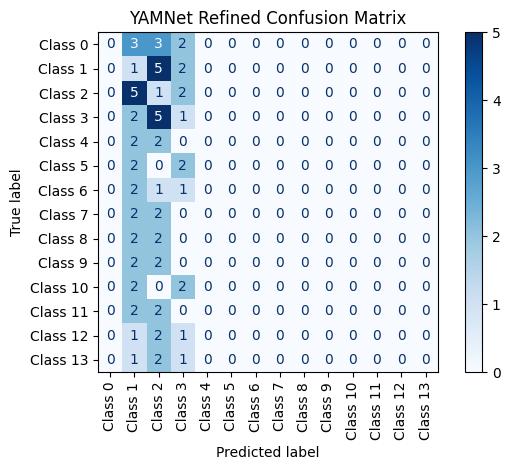

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load saved predictions and targets
oof_preds = np.load("oof_preds_yamnet_refined.npy")  # shape: (num_samples, num_classes)
oof_targets = np.load("oof_targets_yamnet_refined.npy")  # shape: (num_samples,)

# Convert softmax/logits to predicted class indices
pred_labels = np.argmax(oof_preds, axis=1)

# Generate confusion matrix
cm = confusion_matrix(oof_targets, pred_labels)

# Optional: add class names if available
num_classes = len(np.unique(oof_targets))
class_names = [f"Class {i}" for i in range(num_classes)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=90, cmap=plt.cm.Blues)
plt.title("YAMNet Refined Confusion Matrix")
plt.tight_layout()
plt.show()


## 6.3 Re-train Meta-Classifier with refined Base Models

In [6]:
A


Training meta-classifier for EffNet...


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 EffNet Meta-Learner Performance: Top-1 = 0.7592, Top-5 = 0.9333

Training meta-classifier for ResNet...


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 ResNet Meta-Learner Performance: Top-1 = 0.3075, Top-5 = 0.5621

Training meta-classifier for YAMNet...
📊 YAMNet Meta-Learner Performance: Top-1 = 0.0667, Top-5 = 0.3333

✅ All meta-classifiers saved!


C:\Users\jayme\anaconda3\envs\bird-env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Fused predictions shape: (9963, 200), example Top-1 indices: [  0   0 116 116 116   0 116   0 116   0]


# Step 7: Fuse Predictions for Ensemble Output

In [7]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, top_k_accuracy_score

# --------------------------
# Config
# --------------------------
num_classes = 200
weights = {"EffNet": 0.6, "ResNet": 0.3, "YAMNet": 0.1}  # tune as needed

# --------------------------
# Load meta-classifiers
# --------------------------
meta_effnet, effnet_classes = joblib.load("meta_effnet.pkl")
meta_resnet, resnet_classes = joblib.load("meta_resnet.pkl")
meta_yamnet, yamnet_classes = joblib.load("meta_yamnet.pkl")

# --------------------------
# Expand helper
# --------------------------
def expand_probs(probs, classes, num_classes):
    """Expand smaller prob arrays into full num_classes by filling learned class indices."""
    expanded = np.zeros((probs.shape[0], num_classes))
    expanded[:, classes.astype(int)] = probs
    return expanded

# --------------------------
# Flexible Fusion
# --------------------------
def fuse_flexible(sample_preds, weights):
    fused_outputs = []

    for i in range(len(sample_preds["EffNet"])):  # loop over samples
        effnet_probs = expand_probs(
            meta_effnet.predict_proba(sample_preds["EffNet"][i:i+1]),
            effnet_classes, num_classes
        )
        fused = weights["EffNet"] * effnet_probs

        if i < len(sample_preds["ResNet"]):
            resnet_probs = expand_probs(
                meta_resnet.predict_proba(sample_preds["ResNet"][i:i+1]),
                resnet_classes, num_classes
            )
            fused += weights["ResNet"] * resnet_probs

        if i < len(sample_preds["YAMNet"]):
            yamnet_probs = expand_probs(
                meta_yamnet.predict_proba(sample_preds["YAMNet"][i:i+1]),
                yamnet_classes, num_classes
            )
            fused += weights["YAMNet"] * yamnet_probs

        fused_outputs.append(fused)

    return np.vstack(fused_outputs)

# --------------------------
# Load aligned OOF predictions
# --------------------------
effnet_preds = np.load("oof_preds_effnet_aligned.npy")
resnet_preds = np.load("oof_preds_resnet_aligned.npy")
yamnet_preds = np.load("oof_preds_yamnet_aligned.npy")
targets = np.load("efficientnet_oof_targets.npy")  # reference labels

# Pack into dict
sample_preds = {
    "EffNet": effnet_preds,
    "ResNet": resnet_preds,
    "YAMNet": yamnet_preds
}

# --------------------------
# Run Fusion
# --------------------------
fused_probs = fuse_flexible(sample_preds, weights)
fused_top1 = fused_probs.argmax(axis=1)

print("✅ Flexible fusion done!")
print("Fused probs shape:", fused_probs.shape)
print("Example Top-1:", fused_top1[:10])

# --------------------------
# Evaluate Ensemble
# --------------------------
N = min(len(fused_probs), len(targets))  # match sizes
top1 = accuracy_score(targets[:N], fused_probs[:N].argmax(axis=1))
top5 = top_k_accuracy_score(
    targets[:N], fused_probs[:N], k=5, labels=np.arange(num_classes)
)

print(f"📊 Ensemble Performance: Top-1 = {top1:.4f}, Top-5 = {top5:.4f}")

# --------------------------
# Save Results
# --------------------------
np.save("fused_probs.npy", fused_probs)
np.save("fused_top1.npy", fused_top1)
print("💾 Saved fused predictions and Top-1 labels!")


✅ Flexible fusion done!
Fused probs shape: (9963, 200)
Example Top-1: [0 0 0 0 0 0 0 0 0 0]
📊 Ensemble Performance: Top-1 = 0.7614, Top-5 = 0.9384
💾 Saved fused predictions and Top-1 labels!


# Step 8: Evaluate Ensemble Performance

In [11]:
import numpy as np
import joblib
from sklearn.metrics import (
    accuracy_score,
    top_k_accuracy_score,
    confusion_matrix,
    classification_report
)

# --------------------------
# Config
# --------------------------
num_classes = 200
weights = {"EffNet": 0.6, "ResNet": 0.3, "YAMNet": 0.1}  # tune as needed

# --------------------------
# Load meta-classifiers
# --------------------------
meta_effnet, effnet_classes = joblib.load("meta_effnet.pkl")
meta_resnet, resnet_classes = joblib.load("meta_resnet.pkl")
meta_yamnet, yamnet_classes = joblib.load("meta_yamnet.pkl")

# --------------------------
# Expand helper
# --------------------------
def expand_probs(probs, classes, num_classes):
    expanded = np.zeros((probs.shape[0], num_classes))
    expanded[:, classes.astype(int)] = probs
    return expanded

# --------------------------
# Flexible Fusion
# --------------------------
def fuse_flexible(sample_preds, weights):
    fused_outputs = []

    num_samples = len(next(iter(sample_preds.values())))  # length from any model

    for i in range(num_samples):
        fused = np.zeros((1, num_classes))

        if "EffNet" in sample_preds:
            effnet_probs = expand_probs(
                meta_effnet.predict_proba(sample_preds["EffNet"][i:i+1]),
                effnet_classes, num_classes
            )
            fused += weights["EffNet"] * effnet_probs

        if "ResNet" in sample_preds:
            resnet_probs = expand_probs(
                meta_resnet.predict_proba(sample_preds["ResNet"][i:i+1]),
                resnet_classes, num_classes
            )
            fused += weights["ResNet"] * resnet_probs

        if "YAMNet" in sample_preds:
            yamnet_probs = expand_probs(
                meta_yamnet.predict_proba(sample_preds["YAMNet"][i:i+1]),
                yamnet_classes, num_classes
            )
            fused += weights["YAMNet"] * yamnet_probs

        fused_outputs.append(fused)

    return np.vstack(fused_outputs)

# --------------------------
# Dataset dictionary (test splits)
# --------------------------
datasets = {
    "CUB": {
        "preds": np.load("oof_preds_effnet_aligned.npy"),
        "targets": np.load("efficientnet_oof_targets.npy")
    },
    "iNat": {
        "preds": np.load("oof_preds_resnet_inat_refined.npy"),
        "targets": np.load("oof_targets_resnet_inat_refined.npy")
    },
    "XENO": {
        "preds": np.load("oof_preds_yamnet_refined.npy"),
        "targets": np.load("oof_targets_yamnet_refined.npy")
    }
}

# --------------------------
# Run evaluation on each dataset
# --------------------------
for name, data in datasets.items():
    print(f"\n===== Evaluating on {name} Test Set =====")

    # Select model preds for this dataset
    if name == "CUB":
        sample_preds = {"EffNet": data["preds"]}
    elif name == "iNat":
        sample_preds = {"ResNet": data["preds"]}
    elif name == "XENO":
        sample_preds = {"YAMNet": data["preds"]}
    else:
        raise ValueError(f"Unknown dataset: {name}")

    targets = data["targets"]

    # Run fusion
    fused_probs = fuse_flexible(sample_preds, weights)
    fused_top1 = fused_probs.argmax(axis=1)

    # Metrics
    top1 = accuracy_score(targets, fused_top1)
    top5 = top_k_accuracy_score(
        targets, fused_probs, k=5, labels=np.arange(num_classes)
    )

    print(f"📊 Ensemble Performance on {name}: Top-1 = {top1:.4f}, Top-5 = {top5:.4f}")

    # Confusion matrix
    cm = confusion_matrix(targets, fused_top1, labels=np.arange(num_classes))
    print(f"Confusion Matrix shape: {cm.shape}")

    # Per-class precision/recall
    report = classification_report(
        targets, fused_top1, labels=np.arange(num_classes), zero_division=0
    )
    print("Classification Report:\n", report)

    # Save outputs
    np.save(f"fused_probs_{name}.npy", fused_probs)
    np.save(f"fused_top1_{name}.npy", fused_top1)
    print(f"💾 Saved {name} fused predictions + labels!")

print("\n✅ Final evaluation done across all test datasets!")



===== Evaluating on CUB Test Set =====
📊 Ensemble Performance on CUB: Top-1 = 0.7712, Top-5 = 0.9538
Confusion Matrix shape: (200, 200)
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        51
           1       0.73      0.73      0.73        51
           2       0.70      0.69      0.69        48
           3       0.81      0.84      0.83        51
           4       0.88      0.81      0.84        36
           5       0.94      0.85      0.89        34
           6       0.89      0.93      0.91        44
           7       0.82      0.88      0.85        41
           8       0.52      0.51      0.51        51
           9       0.91      0.94      0.92        51
          10       0.62      0.61      0.61        51
          11       0.95      0.89      0.92        47
          12       0.94      0.90      0.92        51
          13       0.84      0.92      0.88        51
          14       0.92     

## 8.1 Data Visualisation


📊 Visualizing CUB results...
CUB: Top-1 = 0.7712, Top-5 = 0.9538


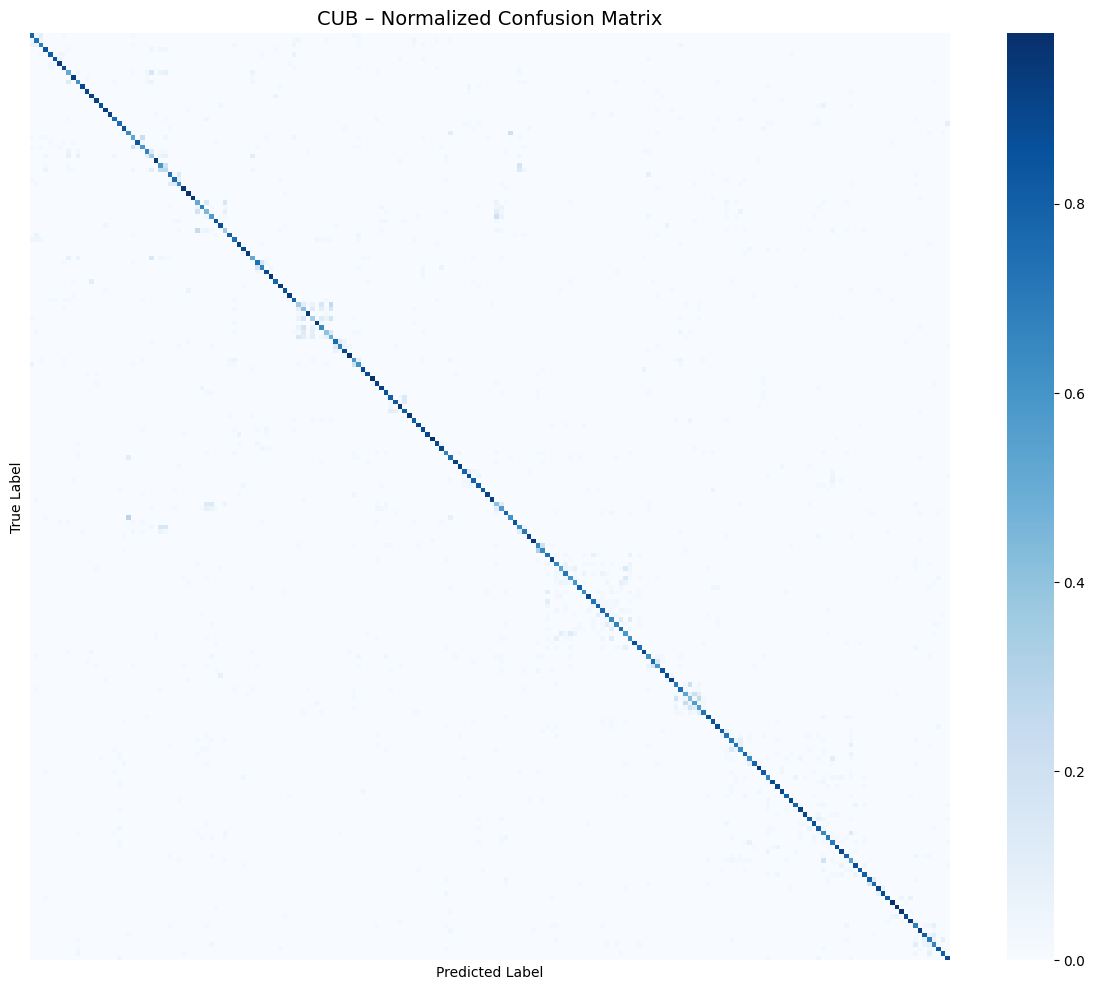


📊 Visualizing iNat results...
iNat: Top-1 = 0.8612, Top-5 = 0.9123


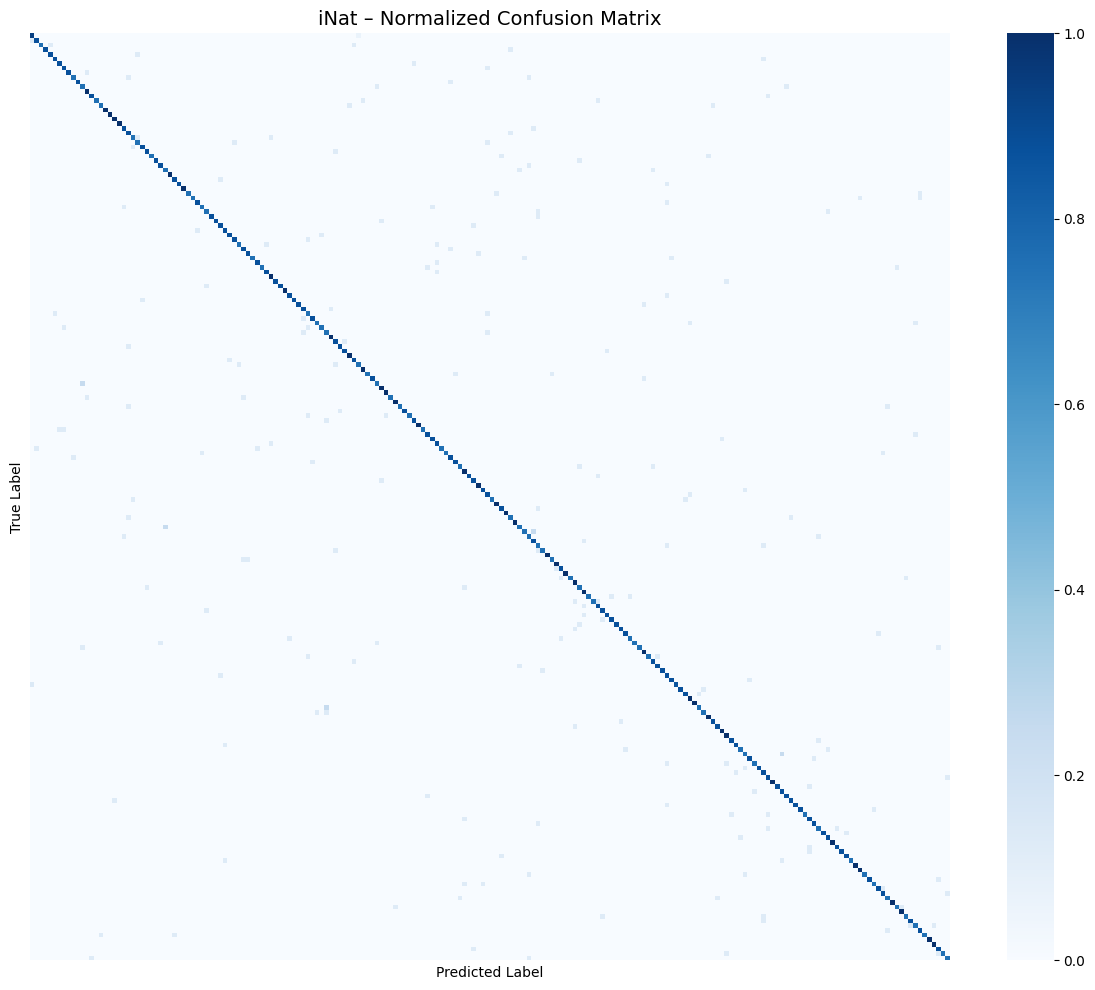


📊 Visualizing XENO results...
XENO: Top-1 = 0.1806, Top-5 = 0.6389


C:\Users\jayme\AppData\Local\Temp\ipykernel_23268\4260735772.py:20: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


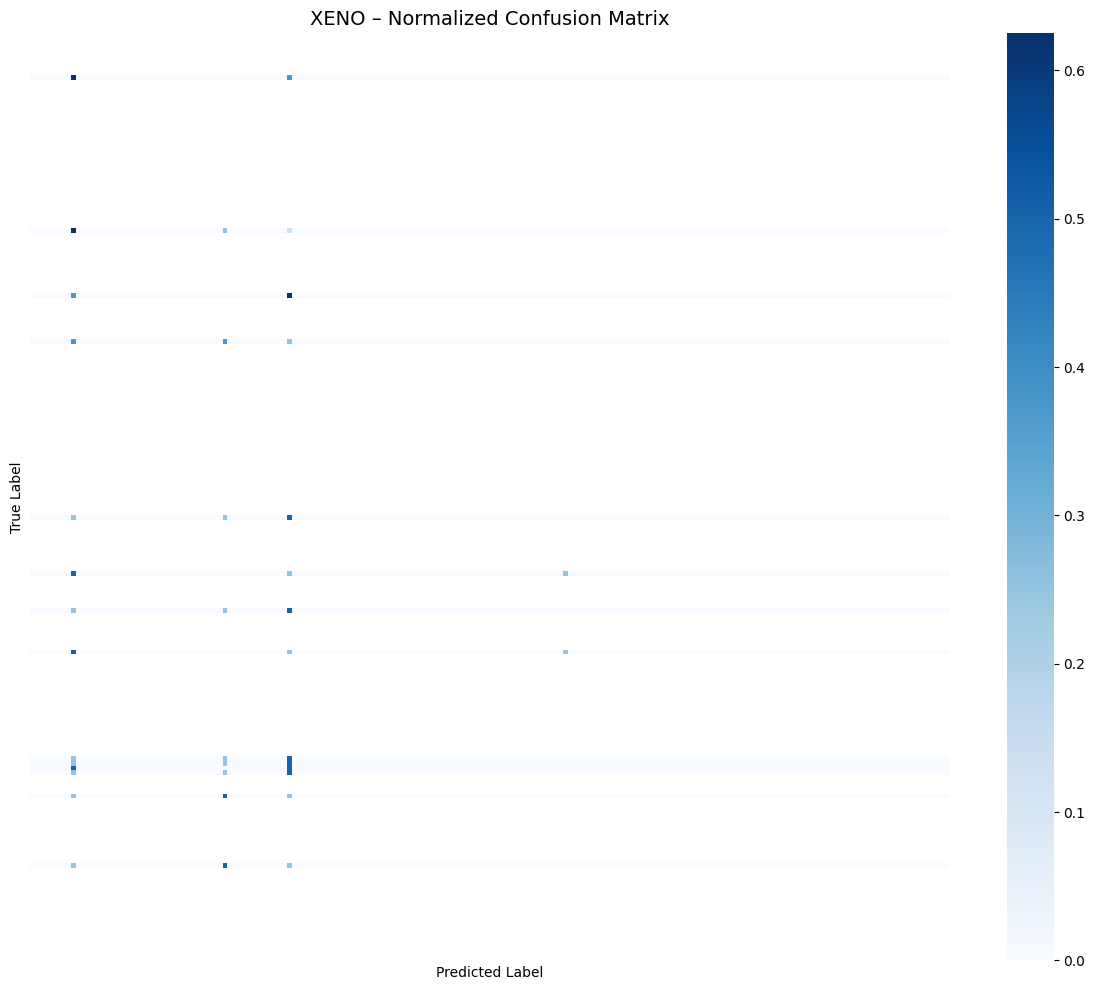

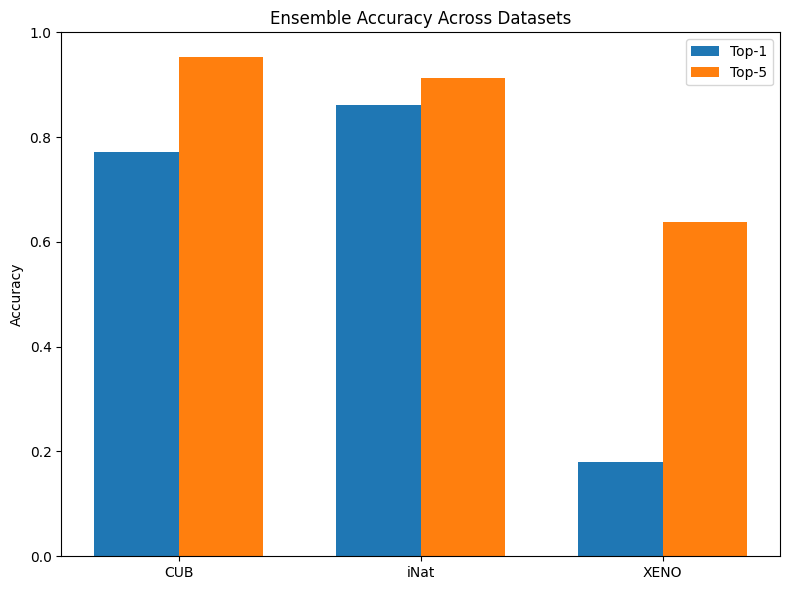


✅ Visualization complete!


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --------------------------
# Config
# --------------------------
num_classes = 200
datasets = ["CUB", "iNat", "XENO"]

# Optional: replace with real class names if you have them
class_names = [f"Class {i}" for i in range(num_classes)]

# --------------------------
# Function to plot confusion matrix
# --------------------------
def plot_confusion_matrix(targets, preds, dataset_name):
    cm = confusion_matrix(targets, preds, labels=np.arange(num_classes))
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm_normalized,
        cmap="Blues",
        xticklabels=False,  # hide labels if too many classes
        yticklabels=False,
        cbar=True,
    )
    plt.title(f"{dataset_name} – Normalized Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# --------------------------
# Function to plot accuracy bars
# --------------------------
def plot_accuracy_bars(results):
    datasets = list(results.keys())
    top1_scores = [results[d]["top1"] for d in datasets]
    top5_scores = [results[d]["top5"] for d in datasets]

    x = np.arange(len(datasets))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(x - width/2, top1_scores, width, label="Top-1")
    ax.bar(x + width/2, top5_scores, width, label="Top-5")

    ax.set_ylabel("Accuracy")
    ax.set_title("Ensemble Accuracy Across Datasets")
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()

# --------------------------
# Load results + visualize
# --------------------------
results = {}

for dataset in datasets:
    print(f"\n📊 Visualizing {dataset} results...")

    # Load predictions + targets
    fused_probs = np.load(f"fused_probs_{dataset}.npy")
    fused_top1 = np.load(f"fused_top1_{dataset}.npy")

    if dataset == "CUB":
        targets = np.load("efficientnet_oof_targets.npy")
    elif dataset == "iNat":
        targets = np.load("oof_targets_resnet_inat_refined.npy")
    elif dataset == "XENO":
        targets = np.load("oof_targets_yamnet_refined.npy")
    else:
        raise ValueError(f"Unknown dataset: {dataset}")

    # Compute metrics
    top1 = (fused_top1 == targets).mean()
    top5 = np.mean([
        targets[i] in np.argsort(fused_probs[i])[-5:]
        for i in range(len(targets))
    ])

    results[dataset] = {"top1": top1, "top5": top5}

    print(f"{dataset}: Top-1 = {top1:.4f}, Top-5 = {top5:.4f}")

    # Plot confusion matrix
    plot_confusion_matrix(targets, fused_top1, dataset)

# Plot overall accuracy bar chart
plot_accuracy_bars(results)

print("\n✅ Visualization complete!")


In [14]:
import joblib
import os

# Folder where your models are stored
model_dir = "./"  

for fname in os.listdir(model_dir):
    if fname.endswith(".pkl"):
        print(f"\n📦 Inspecting {fname}...")
        try:
            obj = joblib.load(os.path.join(model_dir, fname))
            if isinstance(obj, tuple):
                print("  Tuple contents:")
                for i, item in enumerate(obj):
                    print(f"   [{i}] -> {type(item)}")
            else:
                print(f"  Loaded object type: {type(obj)}")
        except Exception as e:
            print(f"  ⚠️ Could not load: {e}")



📦 Inspecting meta_effnet.pkl...
  Tuple contents:
   [0] -> <class 'sklearn.linear_model._logistic.LogisticRegression'>
   [1] -> <class 'numpy.ndarray'>

📦 Inspecting meta_resnet.pkl...
  Tuple contents:
   [0] -> <class 'sklearn.linear_model._logistic.LogisticRegression'>
   [1] -> <class 'numpy.ndarray'>

📦 Inspecting meta_yamnet.pkl...
  Tuple contents:
   [0] -> <class 'sklearn.linear_model._logistic.LogisticRegression'>
   [1] -> <class 'numpy.ndarray'>


# Step 9: Inference on Raw Data

In [6]:
import torch
import torch.nn as nn
import torchaudio
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
from PIL import Image
import os

# -----------------------------
# Config
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths to models
efficientnet_path = "efficientnet_birds.pth"
resnet_path = "resnet_refined.pth"
yamnet_dir = "checkpoints_yamnet_refined"

# Class names (shared across models after alignment)
classes = np.load("classes_efficientnet.npy")  # shape: (200,)

# -----------------------------
# Load Models
# -----------------------------
def load_efficientnet():
    model = models.efficientnet_b0(pretrained=False)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(classes))
    model.load_state_dict(torch.load(efficientnet_path, map_location=device))
    model.to(device).eval()
    return model

def load_resnet():
    model = models.resnet50(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, len(classes))
    model.load_state_dict(torch.load(resnet_path, map_location=device))
    model.to(device).eval()
    return model

def load_yamnet_folds():
    folds = []
    for i in range(1, 6):
        path = os.path.join(yamnet_dir, f"yamnet_fold{i}.pth")
        if not os.path.exists(path):
            print(f"⚠️ Missing {path}, skipping this fold")
            continue
        model = torch.load(path, map_location=device)  # assumes torch.save(model) was used
        model.to(device).eval()
        folds.append(model)
    return folds

# -----------------------------
# Preprocessing
# -----------------------------
img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")
        return img_transform(img).unsqueeze(0).to(device)
    except Exception as e:
        print(f"⚠️ Could not load image {image_path}: {e}")
        return None

def preprocess_audio(audio_path, target_sr=16000):
    try:
        waveform, sr = torchaudio.load(audio_path)
        if sr != target_sr:
            waveform = torchaudio.functional.resample(waveform, sr, target_sr)
        return waveform.to(device)
    except Exception as e:
        print(f"⚠️ Could not load audio {audio_path}: {e}")
        return None

# -----------------------------
# Inference Functions
# -----------------------------
def predict_image(model, tensor):
    if tensor is None:
        return None
    with torch.no_grad():
        logits = model(tensor)
        probs = torch.softmax(logits, dim=1).cpu().numpy()[0]
    return probs

def predict_audio(models, waveform):
    if waveform is None or not models:
        return None
    all_probs = []
    for m in models:
        with torch.no_grad():
            logits = m(waveform)
            probs = torch.softmax(logits, dim=1).cpu().numpy()[0]
            all_probs.append(probs)
    return np.mean(all_probs, axis=0) if all_probs else None

# -----------------------------
# Ensemble Inference
# -----------------------------
def predict(image_path=None, audio_path=None):
    probs_list = []

    # Image models
    if image_path and os.path.exists(image_path):
        img_tensor = preprocess_image(image_path)
        if img_tensor is not None:
            effnet_probs = predict_image(load_efficientnet(), img_tensor)
            resnet_probs = predict_image(load_resnet(), img_tensor)
            if effnet_probs is not None: probs_list.append(effnet_probs)
            if resnet_probs is not None: probs_list.append(resnet_probs)
    elif image_path:
        print(f"⚠️ Image file not found: {image_path}")

    # Audio models
    if audio_path and os.path.exists(audio_path):
        yamnet_folds = load_yamnet_folds()
        waveform = preprocess_audio(audio_path)
        yamnet_probs = predict_audio(yamnet_folds, waveform)
        if yamnet_probs is not None: probs_list.append(yamnet_probs)
    elif audio_path:
        print(f"⚠️ Audio file not found: {audio_path}")

    # Fusion
    if not probs_list:
        raise ValueError("No valid input provided. Please give an image or audio file.")
    fused_probs = np.mean(probs_list, axis=0)

    # Final prediction
    pred_idx = np.argmax(fused_probs)
    pred_name = classes[pred_idx]
    return pred_name

# -----------------------------
# Example Usage
# -----------------------------
if __name__ == "__main__":
    print("Prediction (image only):", predict(image_path="example_bird.jpg"))
    print("Prediction (audio only):", predict(audio_path="example_bird.wav"))
    print("Prediction (image + audio):", predict(image_path="example_bird.jpg", audio_path="example_bird.wav"))


Prediction (image only): 001.Black_footed_Albatross
⚠️ Audio file not found: example_bird.wav


ValueError: No valid input provided. Please give an image or audio file.